In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,total_turnover,high,close,open,volume,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23049694.0,23.1326,23.0176,23.0560,995930.0,23.0100,0
2019-01-02 09:40:00,16118445.0,23.0406,22.9640,23.0176,698906.0,22.9103,1
2019-01-02 09:45:00,13180271.0,23.0560,22.9870,22.9640,570908.0,22.9563,2
2019-01-02 09:50:00,18621408.0,23.0560,23.0560,22.9870,807439.0,22.9180,3
2019-01-02 09:55:00,14496614.0,23.1863,23.0176,23.0560,625118.0,23.0023,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Trend.ef = ef
Pair.m = m
PairChain.m = m
CenterStrict.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'L':m.Lv1_L, 'ML':Stick.L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'L':m.Lv2_L, 'ML':TrendLv1.L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'L':m.Lv3_L, 'ML':TrendLv2.L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [17]:

Center0 = type('Center0', (CenterStrict,), {'ML': m.findList('st', 0), 'L': m.findList('center', 0), 'openL':[],  'level': 0})
Center0()
Center1 = type('Center1', (CenterStrict,), {'ML': m.findList('st', 1), 'L': m.findList('center', 1), 'openL':[],  'level': 1})
Center1()
Center2 = type('Center2', (CenterStrict,), {'ML': m.findList('st', 2), 'L': m.findList('center', 2), 'openL':[],  'level': 2})
Center2()
Center3 = type('Center3', (CenterStrict,), {'ML': m.findList('st', 3), 'L': m.findList('center', 3), 'openL':[],  'level': 3})
Center3()

Center3(0, 1, 0, 0)

In [18]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regEvent()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regEvent()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regEvent()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [19]:
m.__dict__

{'CLv0_L': [Center0(0, 1, 0, 0)],
 'CLv1_L': [Center1(0, 1, 0, 0)],
 'CLv2_L': [Center2(0, 1, 0, 0)],
 'CLv3_L': [Center3(0, 1, 0, 0)],
 'CenterStrict_LD': {},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'Lv2_L': [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
 'Lv3_L': [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
 'MPLv0_L': [],
 'MPLv1_L': [],
 'MPLv2_L': [],
 'MPLv3_L': [],
 'PCLv0_L': [<LayerModel5.PairChain at 0x2ecbef9be10>],
 'PCLv1_L': [<LayerModel5.PairChain at 0x2ecbeb4a080>],
 'PCLv2_L': [<LayerModel5.PairChain at 0x2ecbeb4a518>],
 'PCLv3_L': [<LayerModel5.PairChain at 0x2ecbeb4a748>],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv2_L': [Pair-1(TmS:0.0, 0, [0])],
 'PLv3_L': [Pair-1(TmS:0.0, 0, [0])],
 'PT01Lv0_L': [],
 'PT01Lv1_L': [],
 'PT01Lv2_L': [],
 'PT01Lv3_L': [],
 'SIG_L': [SIG0010-0(TmS:0, 0, 0, 0), SIG0010-0(TmS:0, 0, 0, 0)],
 'TmIdx': 0,

In [20]:
ef.event_config

[{'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []}},
  'Stick': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2', 'updateAll', 'distr', 'updateAll'],
    'obj_p': ['m.Lv1_L[-1]',
     'm.PCLv0_L[0]',
     'Center0',
     'm.PLv0_L[-1]',
     'm.SIG_L[0]'],
    'param': ['', '', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']}},
  'level': 0},
 {'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairChainLv1': {'NEW': {'method': [], 'obj_p': [], 'param': []}},
  'TrendLv1': {'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']},
   'NEW': {'method': ['update2', 'update2', 'updateAll', 'distr', 'newCenter'],
    'obj_

In [21]:
Position.m = m
Position.L = m.position

In [22]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:5.0,[[<frame.Event object at 0x000002ECBEFA6BE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x000002ECBEFA2F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:10.0,[[<frame.Event object at 0x000002ECBEFA6BE0>]]
(0, PairChainLv0, NEW)
TmIdx:12.0,[[<frame.Event object at 0x000002ECBEFA2BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x000002ECBEFA2A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x000002ECBEFA2F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18.0,[[<frame.Event object at 0x000002ECBEFA27F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19.0,[[<frame.Event object at 0x000002ECB

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:261.0,[[<frame.Event object at 0x000002ECBEFE4D68>]]
(3, TrendLv3, LVUPD)

TmIdx:262.0,[[<frame.Event object at 0x000002ECBEFF02B0>]]
(0, PairChainLv0, NEW)
TmIdx:262.0,[[<frame.Event object at 0x000002ECBEFF05F8>, <frame.Event object at 0x000002ECBEFF0630>]]
(2, PairChainLv2, NEW)
(2, PairChainLv2, NEW)
TmIdx:265.0,[[<frame.Event object at 0x000002ECBEFF02E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[34, 35]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[34, 35, 36]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:268.0,[[<frame.Event object at 0x000002ECBEFF0780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[34, 35, 36]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (264.0, 22.849, -1)),peak(247.0, 22.4274

TmIdx:491.0,[[<frame.Event object at 0x000002ECBF015240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[70, 71, 72, 73, 74]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (483.0, 23.055999999999997, -1)),peak(481.0, 22.9946, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[70, 71, 72, 73, 74, 75]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:492.0,[[<frame.Event object at 0x000002ECBF00AD68>]]
(0, PairChainLv0, NEW)
TmIdx:493.0,[[<frame.Event object at 0x000002ECBF015390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:494.0,[[<frame.Event object at 0x000002ECBF015080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:496.0,[[<frame.Event object at 0x000002ECBF015048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:497.0,[[<frame.Event object at 0x000002ECBF0152B0>]]
(0, Stick, LVUPD)
m.

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:680.0,[[<frame.Event object at 0x000002ECBF028AC8>]]
(0, PairChainLv0, NEW)
TmIdx:680.0,[[<frame.Event object at 0x000002ECBF028978>]]
(1, PairChainLv1, NEW)
TmIdx:689.0,[[<frame.Event object at 0x000002ECBF028BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[101, 102]
Lv1.update1st:status=0,mp:3,(670.0, 23.1786, -1),(675.0, 22.8873, -1),(689.0, 22.8413, 1),[StdK(674.0, 23.1479, 22.7494, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (678.0, 23.1479, -1)),peak(675.0, 22.8873, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[101, 102, 103]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:689.0,[[<frame.Event object at 0x000002ECBF028A90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:690.0,[[<frame.Event object at 0x000002ECBF0

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:874.0,[[<frame.Event object at 0x000002ECBF04C9B0>]]
(0, PairChainLv0, NEW)
TmIdx:875.0,[[<frame.Event object at 0x000002ECBF04C978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[131, 132]
Lv1.update1st:status=0,mp:3,(839.0, 22.803, -1),(844.0, 22.7494, -1),(875.0, 22.4274, 1),[StdK(866.0, 22.6804, 22.2895, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (871.0, 22.6804, -1)),peak(844.0, 22.7494, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[131, 132, 133]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:875.0,[[<frame.Event object at 0x000002ECBF04CA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:876.0,[[<frame.Event object at 0x000002ECBF04CEB8>]]
(0, PairChainLv0, NEW)
TmIdx:877.0,[[<frame.Event object at 0x000002ECBF04C8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].upd

m.SIG_L[0].updateAll()
TmIdx:1048.0,[[<frame.Event object at 0x000002ECBF0637B8>]]
(0, PairChainLv0, NEW)
TmIdx:1053.0,[[<frame.Event object at 0x000002ECBF063A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
Lv1.upd1st():case1, status:1, mp:[148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158],pp:1
Lv1.produceNewTrend:case1, mp=[149, 150, 151, 152, 153, 154, 155, 156, 157, 158]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (977.0, 20.4959, 1)),peak(972.0, 20.6875, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (981.0, 20.6952, -1)),peak(977.0, 20.4959, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (992.0, 20.4806, 1)),peak(977.0, 20.4959, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (998.0, 20.6645, -1)),peak(992.0, 20.4806, 1),drt:-

m.SIG_L[0].updateAll()
TmIdx:1274.0,[[<frame.Event object at 0x000002ECBF0925C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[188, 189, 190]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1267.0, 24.1137, -1)),peak(1260.0, 24.0754, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[188, 189, 190, 191]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1281.0,[[<frame.Event object at 0x000002ECBF092710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[188, 189, 190, 191]
Lv1.upd1st():case1, status:1, mp:[188, 189, 190, 191, 192],pp:3
Lv1.produceNewTrend:case1, mp=[191, 192]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[191, 192]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1281.0,[[<frame.E

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1377.0,[[<frame.Event object at 0x000002ECBF09F208>]]
(0, PairChainLv0, NEW)
TmIdx:1379.0,[[<frame.Event object at 0x000002ECBF09BEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1381.0,[[<frame.Event object at 0x000002ECBF09F278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1383.0,[[<frame.Event object at 0x000002ECBF09F390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[204, 205, 206, 207]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[204, 205, 206, 207, 208]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1383.0,[[<frame.Event object at 0x000002ECBF09F278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1384.0,[[<frame.Event object at 0x000002ECBF09F550>]]
(0, PairChainLv0, NEW)
TmIdx:1390.0,[[<frame.Event object at 0x000002ECBF09F5F8>]]
(0, Stick, N

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[233, 234, 235, 236, 237]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1542.0, 25.4474, 1)),peak(1533.0, 25.7463, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[233, 234, 235, 236, 237, 238]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1548.0,[[<frame.Event object at 0x000002ECBF0C4080>]]
(0, PairChainLv0, NEW)
TmIdx:1550.0,[[<frame.Event object at 0x000002ECBF0B9E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[233, 234, 235, 236, 237, 238]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[233, 234, 235, 236, 237, 238, 239]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1550.0,[[<frame.Event object at 0x000002ECBF0B9E80>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1675.0,[[<frame.Event object at 0x000002ECBF0D55C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:0,treated.mp:[60, 61]
Lv2.update1st:status=0,mp:3,(1548.0, 25.3171, 1),(1654.0, 29.3641, -1),(1652.0, 29.1265, 1),[StdK(1634.0, 29.6324, 28.5977, -1)]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (1645.0, 28.5977, 1)),peak(1654.0, 29.3641, -1),drt:1
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[60, 61, 62]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:1675.0,[[<frame.Event object at 0x000002ECBF0CEF98>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1676.0,[[<frame.Event object at 0x000002ECBF0D59E8>]]
(0, PairChainLv0, NEW)
TmIdx:1676.0,[[<frame.Event object at 0x000002ECBF0D59B0>]]
(1, PairChainLv1, NEW)
TmIdx:1677.0,[[<frame.Event object at 0x000002ECBF0D5A90

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:1802.0,[[<frame.Event object at 0x000002ECBF0F3518>]]
(0, PairChainLv0, NEW)
TmIdx:1802.0,[[<frame.Event object at 0x000002ECBF0F36D8>]]
(2, PairChainLv2, NEW)
TmIdx:1803.0,[[<frame.Event object at 0x000002ECBF0F35C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1804.0,[[<frame.Event object at 0x000002ECBF0F34E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1806.0,[[<frame.Event object at 0x000002ECBF0F3710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[284, 285, 286, 287]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[284, 285, 286, 287, 288]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1806.0,[[<frame.Event object at 0x000002ECBF0F34E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1809.0,[[<frame.Event object at 0x000002ECBF0F3828>]]
(0, Stick, NEW)
m.Lv1_L[-1].u

(0, PairChainLv0, NEW)
TmIdx:1935.0,[[<frame.Event object at 0x000002ECBF109828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[298, 299, 300, 301, 302, 303, 304, 305]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[298, 299, 300, 301, 302, 303, 304, 305, 306]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1935.0,[[<frame.Event object at 0x000002ECBF1096D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1936.0,[[<frame.Event object at 0x000002ECBF109AC8>, <frame.Event object at 0x000002ECBF109978>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1938.0,[[<frame.Event object at 0x000002ECBF109898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1939.0,[[<frame.Event object at 0x000002ECBF109908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1942.0,[[<frame.Event object at 0x000002ECBF109630>]]
(0, Stick, LVUPD)
m.

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:2005.0,[[<frame.Event object at 0x000002ECBF116908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2005.0,[[<frame.Event object at 0x000002ECBF116940>]]
(2, PairChainLv2, NEW)
TmIdx:2009.0,[[<frame.Event object at 0x000002ECBF116898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2010.0,[[<frame.Event object at 0x000002ECBF116748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2018.0,[[<frame.Event object at 0x000002ECBF116B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[315, 316, 317, 318, 319, 320]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[315, 316, 317, 318, 319, 320, 321]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2018.0,[[<frame.Event object at 0x000002ECBF116710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2019.0,[[<frame.Event object at 0x000002

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2096.0,[[<frame.Event object at 0x000002ECBF12D390>]]
(0, PairChainLv0, NEW)
TmIdx:2100.0,[[<frame.Event object at 0x000002ECBF12D278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333, 334, 335]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[330, 331, 332, 333, 334, 335, 336]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2100.0,[[<frame.Event object at 0x000002ECBF12D198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2101.0,[[<frame.Event object at 0x000002ECBF12D4A8>]]
(0, PairChainLv0, NEW)
TmIdx:2104.0,[[<frame.Event object at 0x000002ECBF12D518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[330, 331, 332, 333, 334, 335, 336]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2098.0, 29.3028, -

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2265.0,[[<frame.Event object at 0x000002ECBF14FAC8>, <frame.Event object at 0x000002ECBF14F9E8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2266.0,[[<frame.Event object at 0x000002ECBF14FA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2268.0,[[<frame.Event object at 0x000002ECBF14F940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[353, 354, 355, 356, 357, 358, 359, 360, 361, 362]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2268.0,[[<frame.Event object at 0x000002ECBF14FA58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2272.0,[[<frame.Event object at 0x000002ECBF14FBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2(

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:2364.0,[[<frame.Event object at 0x000002ECBF1646A0>, <frame.Event object at 0x000002ECBF164748>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2365.0,[[<frame.Event object at 0x000002ECBF1647B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2368.0,[[<frame.Event object at 0x000002ECBF164780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[379, 380, 381, 382]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[379, 380, 381, 382, 383]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2368.0,[[<frame.Event object at 0x000002ECBF1647B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2369.0,[[<frame.Event object at 0x000002ECBF164940>]]
(0, PairChainLv0, NEW)
TmIdx:2372.0,[[<frame.Event object at 0x000002ECBF1649B0>]]
(0,

m.SIG_L[0].updateAll()
TmIdx:2488.0,[[<frame.Event object at 0x000002ECBF17A128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[394, 395, 396, 397, 398, 399, 400, 401]
Lv1.upd1st():case1, status:1, mp:[394, 395, 396, 397, 398, 399, 400, 401, 402],pp:3
Lv1.produceNewTrend:case1, mp=[397, 398, 399, 400, 401, 402]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2467.0, 30.191999999999997, 1)),peak(2457.0, 30.7362, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2470.0, 30.7438, -1)),peak(2467.0, 30.191999999999997, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2477.0, 30.4679, 1)),peak(2467.0, 30.191999999999997, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2479.0, 30.7055, -1)),peak(2467.0, 30.191999999999997, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2483.0, 30.3606, 1)),peak(2467.0, 30.1919999999999

TmIdx:2596.0,[[<frame.Event object at 0x000002ECBF183940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2590.0, 28.6666, 1)),peak(2544.0, 28.59, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2599.0,[[<frame.Event object at 0x000002ECBF183B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2600.0,[[<frame.Event object at 0x000002ECBF1839B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2604.0,[[<frame.Event object at 0x000002ECBF183BA8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2617.0,[[<frame.Event object at 0x000002ECBF183DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()

m.SIG_L[0].updateAll()
TmIdx:2649.0,[[<frame.Event object at 0x000002ECBF189F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2650.0,[[<frame.Event object at 0x000002ECBF1902E8>]]
(0, PairChainLv0, NEW)
TmIdx:2652.0,[[<frame.Event object at 0x000002ECBF190400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2648.0, 28.0228, 1)),peak(2635.0, 28.59, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2653.0,[[<frame.Event object at 0x000002ECBF190278>]]
(0, PairChainLv0, NEW)
TmIdx:2655.0,[[<frame.Event object at 0x000002ECBF190470>]]
(0, Stick, NEW)
m.Lv1_L

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[440, 441, 442, 443]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[440, 441, 442, 443, 444]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2771.0,[[<frame.Event object at 0x000002ECBF19ECF8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2772.0,[[<frame.Event object at 0x000002ECBF1A7400>]]
(0, PairChainLv0, NEW)
TmIdx:2774.0,[[<frame.Event object at 0x000002ECBF1A74A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[440, 441, 442, 443, 444]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2770.0, 28.750999999999998, -1)),peak(2762.0, 28.1608, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[440, 441, 442, 443, 444, 445]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:2933.0,[[<frame.Event object at 0x000002ECBF1B9D68>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:0,treated.mp:[20, 21]
Lv3.update1st:status=0,mp:3,(2064.0, 28.6053, 1),(2838.0, 30.6672, -1),(2617.0, 28.8583, -1),[StdK(2346.0, 32.4838, 28.59, -1)]
Lv3.update2(): flag:1, treated.status:0,treaded.drt:-1,treated.mp:[21, 22]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:2933.0,[[<frame.Event object at 0x000002ECBF1B9C18>]]
(3, TrendLv3, LVUPD)

TmIdx:2934.0,[[<frame.Event object at 0x000002ECBF1C20B8>]]
(0, PairChainLv0, NEW)
TmIdx:2934.0,[[<frame.Event object at 0x000002ECBF1C22E8>]]
(1, PairChainLv1, NEW)
TmIdx:2934.0,[[<frame.Event object at 0x000002ECBF1B9EF0>]]
(2, PairChainLv2, NEW)
TmIdx:2935.0,[[<frame.Event object at 0x000002ECBF1C20F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv

m.SIG_L[0].updateAll()
TmIdx:2988.0,[[<frame.Event object at 0x000002ECBF1C69E8>]]
(0, PairChainLv0, NEW)
TmIdx:2989.0,[[<frame.Event object at 0x000002ECBF1C6D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[479, 480, 481, 482]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[479, 480, 481, 482, 483]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2989.0,[[<frame.Event object at 0x000002ECBF1C6C50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2990.0,[[<frame.Event object at 0x000002ECBF1C6FD0>]]
(0, PairChainLv0, NEW)
TmIdx:2991.0,[[<frame.Event object at 0x000002ECBF1C6A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[479, 480, 481, 482, 483]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2988.0, 33.051, 1)),peak(2978.0, 32.3458, 1),drt:-1
Lv1.update2(): flag:0, treated.status

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:3543.0,[[<frame.Event object at 0x000002ECBF1DAB38>]]
(3, TrendLv3, LVUPD)

TmIdx:3544.0,[[<frame.Event object at 0x000002ECBF1DAC50>]]
(0, PairChainLv0, NEW)
TmIdx:3544.0,[[<frame.Event object at 0x000002ECBF1DAE10>]]
(1, PairChainLv1, NEW)
TmIdx:3544.0,[[<frame.Event object at 0x000002ECBF1DAFD0>]]
(2, PairChainLv2, NEW)
TmIdx:3546.0,[[<frame.Event object at 0x000002ECBF1DACF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3547.0,[[<frame.Event object at 0x000002ECBF1DAAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3549.0,[[<frame.Event object at 0x000002ECBF1DAF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3550.0,[[<frame.Event object at 0x000002ECBF1DAFD0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3556.0,[[<frame.Event object at 0x000002ECBF1E30B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,trea

m.SIG_L[0].updateAll()
TmIdx:3747.0,[[<frame.Event object at 0x000002ECBF1F87F0>]]
(0, PairChainLv0, NEW)
TmIdx:3755.0,[[<frame.Event object at 0x000002ECBF1F8A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[522, 523, 524, 525, 526, 527]
Lv1.upd1st():case1, status:1, mp:[522, 523, 524, 525, 526, 527, 528],pp:3
Lv1.produceNewTrend:case1, mp=[525, 526, 527, 528]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3687.0, 26.3902, 1)),peak(3685.0, 26.5511, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3691.0, 26.6968, -1)),peak(3687.0, 26.3902, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3744.0, 21.2777, 1)),peak(3687.0, 26.3902, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[525, 526, 527, 528]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3880.0,[[<frame.Event object at 0x000002ECBF203898>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3881.0,[[<frame.Event object at 0x000002ECBF203E80>]]
(0, PairChainLv0, NEW)
TmIdx:3882.0,[[<frame.Event object at 0x000002ECBF203EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[545, 546, 547, 548, 549]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3878.0, 21.3237, 1)),peak(3868.0, 21.1704, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[545, 546, 547, 548, 549, 550]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3883.0,[[<frame.Event object at 0x000002ECBF20F048>]]
(0, PairChainLv0, NEW)
TmIdx:3885.0,[[<frame.Event object at 0x000002ECBF203EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3888.0,[[<frame.Event object at 0x000002ECBF203F60>]]
(

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:3945.0,[[<frame.Event object at 0x000002ECBF2149E8>]]
(3, TrendLv3, LVUPD)

TmIdx:3946.0,[[<frame.Event object at 0x000002ECBF214A20>]]
(0, PairChainLv0, NEW)
TmIdx:3946.0,[[<frame.Event object at 0x000002ECBF214B70>]]
(1, PairChainLv1, NEW)
TmIdx:3946.0,[[<frame.Event object at 0x000002ECBF214DA0>]]
(2, PairChainLv2, NEW)
TmIdx:3952.0,[[<frame.Event object at 0x000002ECBF214E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[559, 560]
Lv1.update1st:status=0,mp:3,(3926.0, 22.0212, -1),(3935.0, 21.5306, -1),(3952.0, 21.1551, 1),[StdK(3936.0, 21.4387, 21.1627, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3944.0, 21.4387, -1)),peak(3935.0, 21.5306, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[559, 560, 561]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAl

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4066.0,[[<frame.Event object at 0x000002ECBF231E10>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4009.0, 20.4652, 1)),peak(4013.0, 21.0324, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:4067.0,[[<frame.Event object at 0x000002ECBF23E0B8>, <frame.Event object at 0x000002ECBF2314A8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4067.0,[[<frame.Event object at 0x000002ECBF23E278>]]
(1, PairChainLv1, NEW)
TmIdx:4067.0,[[<frame.Event object at 0x000002ECBF23E358>]]
(2, PairChainLv2, NEW)
TmIdx:4069.0,[[<frame.Event object at 0x000002ECBF231E80>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].update

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4160.0,[[<frame.Event object at 0x000002ECBF23ED68>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26]
Lv3.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26, 27]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:4161.0,[[<frame.Event object at 0x000002ECBF252978>]]
(0, PairChainLv0, NEW)
TmIdx:4161.0,[[<frame.Event object at 0x000002ECBF252C18>]]
(2, PairChainLv2, NEW)
TmIdx:4166.0,[[<frame.Event object at 0x000002ECBF252A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[590, 591, 592, 593, 594, 595]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[590, 591, 592, 593, 594, 595, 596]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4166.0,[[<frame.Event object at 0x

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4291.0,[[<frame.Event object at 0x000002ECBF26E4A8>]]
(0, PairChainLv0, NEW)
TmIdx:4292.0,[[<frame.Event object at 0x000002ECBF26E780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612]
Lv1.upd1st():case1, status:1, mp:[599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613],pp:11
Lv1.produceNewTrend:case1, mp=[610, 611, 612, 613]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4279.0, 20.151, -1)),peak(4280.0, 19.8904, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4282.0, 19.7371, 1)),peak(4279.0, 20.151, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4289.0, 20.3349, -1)),peak(4279.0, 20.151, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4366.0,[[<frame.Event object at 0x000002ECBF26EA58>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4367.0,[[<frame.Event object at 0x000002ECBF279898>]]
(0, PairChainLv0, NEW)
TmIdx:4369.0,[[<frame.Event object at 0x000002ECBF279940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[623, 624, 625, 626]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[623, 624, 625, 626, 627]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4369.0,[[<frame.Event object at 0x000002ECBF26EA58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4370.0,[[<frame.Event object at 0x000002ECBF279B00>]]
(0, PairChainLv0, NEW)
TmIdx:4371.0,[[<frame.Event object at 0x000002ECBF279780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4372.0,[[<frame.Event object at 0x0000

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4479.0,[[<frame.Event object at 0x000002ECBF28F1D0>]]
(0, PairChainLv0, NEW)
TmIdx:4484.0,[[<frame.Event object at 0x000002ECBF28F278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[642, 643, 644, 645]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[642, 643, 644, 645, 646]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4484.0,[[<frame.Event object at 0x000002ECBF289DD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4485.0,[[<frame.Event object at 0x000002ECBF28F4A8>]]
(0, PairChainLv0, NEW)
TmIdx:4490.0,[[<frame.Event object at 0x000002ECBF28F5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[642, 643, 644, 645, 646]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4482.0, 20.4882, -1)),pe

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4582.0,[[<frame.Event object at 0x000002ECBF279518>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26, 27, 28]
Lv3.upd1st():case1, status:1, mp:[23, 24, 25, 26, 27, 28, 29],pp:3
Lv3.produceNewTrend:case1, mp=[26, 27, 28, 29]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4044.0, 22.1132, -1)),peak(4066.0, 21.546, 1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4125.0, 20.8638, 1)),peak(4044.0, 22.1132, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4182.0, 22.3814, -1)),peak(4044.0, 22.1132, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[26, 27, 28, 29]
Lv3.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[29, 30]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:4582.0,[[<

TmIdx:4683.0,[[<frame.Event object at 0x000002ECBF2B40B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[674, 675, 676, 677]
Lv1.upd1st():case1, status:1, mp:[674, 675, 676, 677, 678],pp:3
Lv1.produceNewTrend:case1, mp=[677, 678]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[677, 678]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4683.0,[[<frame.Event object at 0x000002ECBF2A9AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[126, 127, 128, 129, 130, 131, 132]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4669.0, 22.2051, -1)),peak(4671.0, 22.0672, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[126, 127, 128, 129, 130, 131, 132, 133]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", lev

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4788.0,[[<frame.Event object at 0x000002ECBF2C1F60>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4790.0,[[<frame.Event object at 0x000002ECBF2C82E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[696, 697, 698, 699]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[696, 697, 698, 699, 700]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4790.0,[[<frame.Event object at 0x000002ECBF2C1F60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4801.0,[[<frame.Event object at 0x000002ECBF2C8588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[696, 697, 698, 699, 700]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4789.0, 21.1627, -1)),peak(4785.0, 21.1781, -1),drt:1
Lv1.update2(): 

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:4952.0,[[<frame.Event object at 0x000002ECBF2E42E8>]]
(0, PairChainLv0, NEW)
TmIdx:4965.0,[[<frame.Event object at 0x000002ECBF2E4390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[720, 721, 722, 723, 724]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4965.0,[[<frame.Event object at 0x000002ECBF2DDF28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4966.0,[[<frame.Event object at 0x000002ECBF2E46A0>]]
(0, PairChainLv0, NEW)
TmIdx:4968.0,[[<frame.Event object at 0x000002ECBF2E4748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723, 724]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4963.0, 20.5725, -1)),peak(4945.0, 20.3579, -1),drt:1
TrendLv1.up

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:5074.0,[[<frame.Event object at 0x000002ECBF2F0EF0>]]
(3, TrendLv3, LVUPD)

TmIdx:5075.0,[[<frame.Event object at 0x000002ECBF2F0DA0>]]
(0, PairChainLv0, NEW)
TmIdx:5075.0,[[<frame.Event object at 0x000002ECBF2F6128>]]
(1, PairChainLv1, NEW)
TmIdx:5075.0,[[<frame.Event object at 0x000002ECBF2F6080>]]
(2, PairChainLv2, NEW)
TmIdx:5077.0,[[<frame.Event object at 0x000002ECBF2F0F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[733, 734, 735, 736, 737, 738]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[733, 734, 735, 736, 737, 738, 739]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5077.0,[[<frame.Event object at 0x000002ECBF2F0C18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5079.0,[[<frame.Event object at 0x000002ECBF2F6198>]]
(0, Stick, PEAK)
m.PCLv0_

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5168.0,[[<frame.Event object at 0x000002ECBF3075F8>, <frame.Event object at 0x000002ECBF307828>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5169.0,[[<frame.Event object at 0x000002ECBF307898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5170.0,[[<frame.Event object at 0x000002ECBF307630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5172.0,[[<frame.Event object at 0x000002ECBF307470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5176.0,[[<frame.Event object at 0x000002ECBF307908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5177.0,[[<frame.Event object at 0x000002ECBF3076A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5178.0,[[<frame.Event object at 0x000002ECBF307898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5179.0,[[<frame.Event object at 0x000002ECBF3077F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmI

TmIdx:5227.0,[[<frame.Event object at 0x000002ECBF30BE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5228.0,[[<frame.Event object at 0x000002ECBF30B6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5229.0,[[<frame.Event object at 0x000002ECBF30BA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5230.0,[[<frame.Event object at 0x000002ECBF30BC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5233.0,[[<frame.Event object at 0x000002ECBF30B668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[756, 757, 758, 759, 760, 761, 762, 763]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[756, 757, 758, 759, 760, 761, 762, 763, 764]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5233.0,[[<frame.Event object at 0x000002ECBF30BC50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5239.0,[[<frame.Event object at 0x000002ECBF31

m.SIG_L[0].updateAll()
TmIdx:5359.0,[[<frame.Event object at 0x000002ECBF32B198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (5332.0, 20.79, 1)),peak(5265.0, 20.75, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:5360.0,[[<frame.Event object at 0x000002ECBF32B5F8>]]
(0, PairChainLv0, NEW)
TmIdx:5360.0,[[<frame.Event object at 0x000002ECBF32B438>]]
(1, PairChainLv1, NEW)
TmIdx:5364.0,[[<frame.Event object at 0x000002ECBF32B6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784, 785]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784

TmIdx:5447.0,[[<frame.Event object at 0x000002ECBF32FEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5449.0,[[<frame.Event object at 0x000002ECBF3351D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5453.0,[[<frame.Event object at 0x000002ECBF335320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[791, 792, 793, 794, 795]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5447.0, 21.55, 1)),peak(5415.0, 21.55, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[791, 792, 793, 794, 795, 796]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5454.0,[[<frame.Event object at 0x000002ECBF335240>]]
(0, PairChainLv0, NEW)
TmIdx:5458.0,[[<frame.Event object at 0x000002ECBF3354E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[791, 792, 793, 794, 795, 796]
Lv1.upd1st():case1, status:1,

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:5513.0,[[<frame.Event object at 0x000002ECBF337F60>]]
(1, PairChainLv1, NEW)
TmIdx:5514.0,[[<frame.Event object at 0x000002ECBF337E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[800, 801, 802, 803, 804, 805]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[800, 801, 802, 803, 804, 805, 806]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5514.0,[[<frame.Event object at 0x000002ECBF337B38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5523.0,[[<frame.Event object at 0x000002ECBF347240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[800, 801, 802, 803, 804, 805, 806]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5513.0, 21.35, -1)),peak(5494.0, 21.45, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[80

m.SIG_L[0].updateAll()
TmIdx:5637.0,[[<frame.Event object at 0x000002ECBF3595C0>]]
(0, PairChainLv0, NEW)
TmIdx:5645.0,[[<frame.Event object at 0x000002ECBF3597F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[824, 825, 826, 827]
Lv1.upd1st():case1, status:1, mp:[824, 825, 826, 827, 828],pp:1
Lv1.produceNewTrend:case1, mp=[825, 826, 827, 828]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5625.0, 21.12, 1)),peak(5628.0, 21.2, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5631.0, 21.21, -1)),peak(5625.0, 21.12, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5635.0, 21.04, 1)),peak(5625.0, 21.12, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[825, 826, 827, 828]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5645.0,[[<frame.Event object at 0

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:5770.0,[[<frame.Event object at 0x000002ECBF3704A8>, <frame.Event object at 0x000002ECBF370550>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5770.0,[[<frame.Event object at 0x000002ECBF370518>]]
(2, PairChainLv2, NEW)
TmIdx:5771.0,[[<frame.Event object at 0x000002ECBF370780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5772.0,[[<frame.Event object at 0x000002ECBF370390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5773.0,[[<frame.Event object at 0x000002ECBF370358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5774.0,[[<frame.Event object at 0x000002ECBF3704A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5775.0,[[<frame.Event object at 0x000002ECBF370518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5783.0,[[<frame.Event object at 0x000002ECBF370978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.upda

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5864.0,[[<frame.Event object at 0x000002ECBF37C518>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (5840.0, 23.29, -1)),peak(5795.0, 23.95, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:5865.0,[[<frame.Event object at 0x000002ECBF37CDA0>]]
(0, PairChainLv0, NEW)
TmIdx:5865.0,[[<frame.Event object at 0x000002ECBF37CB70>]]
(1, PairChainLv1, NEW)
TmIdx:5870.0,[[<frame.Event object at 0x000002ECBF37CE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[855, 856, 857, 858]
Lv1.update2(): fl

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:5988.0,[[<frame.Event object at 0x000002ECBF393898>]]
(0, PairChainLv0, NEW)
TmIdx:5988.0,[[<frame.Event object at 0x000002ECBF393A58>]]
(1, PairChainLv1, NEW)
TmIdx:5988.0,[[<frame.Event object at 0x000002ECBF393B00>]]
(2, PairChainLv2, NEW)
TmIdx:5993.0,[[<frame.Event object at 0x000002ECBF393940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[872, 873, 874, 875]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[872, 873, 874, 875, 876]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5993.0,[[<frame.Event object at 0x000002ECBF3935F8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5994.0,[[<frame.Event object at 0x000002ECBF393CF8>]]
(0, PairChainLv0, NEW)
TmIdx:6004.0,[[<frame.Event object at 0x000002ECBF393E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.upd

m.SIG_L[0].updateAll()
TmIdx:6133.0,[[<frame.Event object at 0x000002ECBF3AAF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[892, 893, 894, 895, 896, 897, 898, 899]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897, 898, 899, 900]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6134.0,[[<frame.Event object at 0x000002ECBF3AAE48>]]
(0, PairChainLv0, NEW)
TmIdx:6137.0,[[<frame.Event object at 0x000002ECBF3B52E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[892, 893, 894, 895, 896, 897, 898, 899, 900]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6131.0, 21.32, -1)),peak(6101.0, 21.29, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897, 898, 899, 900, 901]
m.PCLv0_L[0].update2(

m.SIG_L[0].updateAll()
TmIdx:6292.0,[[<frame.Event object at 0x000002ECBF3C1EF0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]
Lv2.upd1st():case1, status:1, mp:[173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185],pp:9
Lv2.produceNewTrend:case1, mp=[182, 183, 184, 185]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (6174.0, 21.52, -1)),peak(6196.0, 21.5, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (6231.0, 21.28, 1)),peak(6174.0, 21.52, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (6248.0, 21.47, -1)),peak(6174.0, 21.52, -1),drt:1
Lv2.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[182, 183, 184, 185]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:6292.0,[[<frame.Event object at 0x000002ECBF3CA0B8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:6392.0,[[<frame.Event object at 0x000002ECBF3DAE10>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[32, 33, 34, 35, 36, 37, 38, 39]
Lv3.upd1st():case1, status:1, mp:[32, 33, 34, 35, 36, 37, 38, 39, 40],pp:5
Lv3.produceNewTrend:case1, mp=[37, 38, 39, 40]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (6144.0, 20.76, 1)),peak(5987.0, 21.52, -1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (6174.0, 21.52, -1)),peak(6144.0, 20.76, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (6335.0, 21.1, 1)),peak(6144.0, 20.76, 1),drt:-1
Lv3.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[37, 38, 39, 40]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:6392.0,[[<frame.Event object at 0x000002ECBF3DACC0>]]
(3, TrendLv3, NEW)
Center3.upda

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:6538.0,[[<frame.Event object at 0x000002ECBF3EBF98>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6539.0,[[<frame.Event object at 0x000002ECBF3F52B0>]]
(0, PairChainLv0, NEW)
TmIdx:6539.0,[[<frame.Event object at 0x000002ECBF3F5278>]]
(1, PairChainLv1, NEW)
TmIdx:6540.0,[[<frame.Event object at 0x000002ECBF3F5358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6541.0,[[<frame.Event object at 0x000002ECBF3E7FD0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6546.0,[[<frame.Event object at 0x000002ECBF3F5198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[953, 954, 955, 956]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[953, 954, 955, 956, 957]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6546.0,[[<frame.Event object at 0x000002E

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:6633.0,[[<frame.Event object at 0x000002ECBF400470>]]
(0, PairChainLv0, NEW)
TmIdx:6633.0,[[<frame.Event object at 0x000002ECBF400438>]]
(1, PairChainLv1, NEW)
TmIdx:6633.0,[[<frame.Event object at 0x000002ECBF4006A0>]]
(2, PairChainLv2, NEW)
TmIdx:6635.0,[[<frame.Event object at 0x000002ECBF400518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[965, 966, 967, 968]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[965, 966, 967, 968, 969]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6635.0,[[<frame.Event object at 0x000002ECBF3F50F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6638.0,[[<frame.Event object at 0x000002ECBF4007B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[965, 966, 967, 968, 969]
TrendL

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[980, 981, 982, 983, 984, 985, 986, 987, 988, 989]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6777.0,[[<frame.Event object at 0x000002ECBF4189B0>]]
(0, PairChainLv0, NEW)
TmIdx:6780.0,[[<frame.Event object at 0x000002ECBF418BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[980, 981, 982, 983, 984, 985, 986, 987, 988, 989]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6780.0,[[<frame.Event object at 0x000002ECBF418A90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6781.0,[[<frame.Event object at 0x000002ECBF418E48>]]
(0, PairChainLv0, NEW)
TmIdx:6788.0,[[<frame.Event object at 0x000002ECBF

Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6906.0,[[<frame.Event object at 0x000002ECBF430C88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6907.0,[[<frame.Event object at 0x000002ECBF430D68>]]
(0, PairChainLv0, NEW)
TmIdx:6910.0,[[<frame.Event object at 0x000002ECBF430630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6912.0,[[<frame.Event object at 0x000002ECBF430828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6913.0,[[<frame.Event object at 0x000002ECBF4309E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6925.0,[[<frame.Event object at 0x000002ECBF430F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:7039.0,[[<frame.Event object at 0x000002ECBF41F908>]]
(3, TrendLv3, LVUPD)

TmIdx:7040.0,[[<frame.Event object at 0x000002ECBF442518>]]
(1, PairChainLv1, NEW)
TmIdx:7040.0,[[<frame.Event object at 0x000002ECBF4424E0>]]
(2, PairChainLv2, NEW)
TmIdx:7047.0,[[<frame.Event object at 0x000002ECBF4424A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7047.0,[[<frame.Event object at 0x000002ECBF4421D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7051.0,[[<frame.Event object at 0x000002ECBF442278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7052.0,[[<frame.Event object at 0x000002ECBF4426D8>]]
(0, Stick, PEA

TmIdx:7201.0,[[<frame.Event object at 0x000002ECBF451A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7206.0,[[<frame.Event object at 0x000002ECBF461320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1045, 1046, 1047, 1048, 1049]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7200.0, 25.3, 1)),peak(7201.0, 25.58, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1045, 1046, 1047, 1048, 1049, 1050]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7207.0,[[<frame.Event object at 0x000002ECBF461128>]]
(0, PairChainLv0, NEW)
TmIdx:7208.0,[[<frame.Event object at 0x000002ECBF461470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1045, 1046, 1047, 1048, 1049, 1050]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1045,

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7254.0,[[<frame.Event object at 0x000002ECBF464C18>]]
(0, PairChainLv0, NEW)
TmIdx:7255.0,[[<frame.Event object at 0x000002ECBF464CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1057, 1058, 1059, 1060, 1061]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7255.0,[[<frame.Event object at 0x000002ECBF464978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7261.0,[[<frame.Event object at 0x000002ECBF464E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060, 1061]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7254.0, 26.57, 1)),peak(7248.0, 26.0, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1057, 1058, 1059, 1

m.SIG_L[0].updateAll()
TmIdx:7314.0,[[<frame.Event object at 0x000002ECBF46E4A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7251.0, 27.25, -1)),peak(7028.0, 28.16, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7318.0,[[<frame.Event object at 0x000002ECBF46EA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075]
m.PCLv0_L[0].update2()


Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:7369.0,[[<frame.Event object at 0x000002ECBF47B320>]]
(2, PairChainLv2, NEW)
TmIdx:7380.0,[[<frame.Event object at 0x000002ECBF47B358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1082, 1083, 1084, 1085, 1086]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7380.0,[[<frame.Event object at 0x000002ECBF47B080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7381.0,[[<frame.Event object at 0x000002ECBF47B828>]]
(0, PairChainLv0, NEW)
TmIdx:7385.0,[[<frame.Event object at 0x000002ECBF47B8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085, 1086]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7378.0, 26

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7542.0,[[<frame.Event object at 0x000002ECBF492F60>, <frame.Event object at 0x000002ECBF492C18>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7543.0,[[<frame.Event object at 0x000002ECBF492DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7545.0,[[<frame.Event object at 0x000002ECBF492E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7548.0,[[<frame.Event object at 0x000002ECBF495080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1108, 1109, 1110, 1111]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1108, 1109, 1110, 1111, 1112]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7548.0,[[<frame.Event object at 0x000002ECBF492E10>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7549.0,[[<frame.Event objec

TmIdx:7662.0,[[<frame.Event object at 0x000002ECBF4A0748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1122, 1123, 1124, 1125]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1122, 1123, 1124, 1125, 1126]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7665.0,[[<frame.Event object at 0x000002ECBF4A07F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1122, 1123, 1124, 1125, 1126]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7661.0, 24.68, -1)),peak(7649.0, 24.81, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1122, 1123, 1124, 1125, 1126, 1127]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7667.0,[[<frame.Event object at 0x000002ECBF4A09E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7668.0,[[<frame.Event object at 0x0

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[222, 223, 224, 225, 226, 227]
Lv2.upd1st():case1, status:1, mp:[222, 223, 224, 225, 226, 227, 228],pp:3
Lv2.produceNewTrend:case1, mp=[225, 226, 227, 228]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7676.0, 24.47, 1)),peak(7689.0, 24.59, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7690.0, 24.72, -1)),peak(7676.0, 24.47, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7707.0, 24.44, 1)),peak(7676.0, 24.47, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[225, 226, 227, 228]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7718.0,[[<frame.Event object at 0x000002ECBF4A7DD8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:

m.SIG_L[0].updateAll()
TmIdx:7796.0,[[<frame.Event object at 0x000002ECBF4B5668>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[225, 226, 227, 228, 229, 230]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[225, 226, 227, 228, 229, 230, 231]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7796.0,[[<frame.Event object at 0x000002ECBF4B5978>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7800.0,[[<frame.Event object at 0x000002ECBF4B5D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1147, 1148]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1147, 1148, 1149]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7801.0,[[<frame.Event object at 0x000002ECBF4B5F60>]]
(0, PairChainLv0, NEW)
TmIdx:7805.0,[[<frame.Event obj

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:7875.0,[[<frame.Event object at 0x000002ECBF4C0C18>]]
(0, PairChainLv0, NEW)
TmIdx:7875.0,[[<frame.Event object at 0x000002ECBF4C0DD8>]]
(1, PairChainLv1, NEW)
TmIdx:7875.0,[[<frame.Event object at 0x000002ECBF4C0EB8>]]
(2, PairChainLv2, NEW)
TmIdx:7879.0,[[<frame.Event object at 0x000002ECBF4C0CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1159, 1160, 1161, 1162]
Lv1.upd1st():case1, status:1, mp:[1159, 1160, 1161, 1162, 1163],pp:1
Lv1.produceNewTrend:case1, mp=[1160, 1161, 1162, 1163]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7865.0, 25.5, -1)),peak(7866.0, 25.36, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7868.0, 25.33, 1)),peak(7865.0, 25.5, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7872.0, 25.7, -1)),peak(7865.0, 25.5, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2()

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7973.0, 25.92, 1)),peak(7968.0, 26.22, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7978.0, 26.14, -1)),peak(7968.0, 26.22, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7982.0, 25.94, 1)),peak(7968.0, 26.22, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7988.0, 26.3, -1)),peak(7968.0, 26.22, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1176, 1177, 1178, 1179, 1180, 1181]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7994.0,[[<frame.Event object at 0x000002ECBF4DEB70>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[232, 233, 234, 235, 236, 237, 238, 239]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[232, 233, 234, 235, 236, 237, 238, 239, 2

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8040.0,[[<frame.Event object at 0x000002ECBF4EF400>]]
(0, PairChainLv0, NEW)
TmIdx:8042.0,[[<frame.Event object at 0x000002ECBF4EF4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1186, 1187, 1188, 1189]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1186, 1187, 1188, 1189, 1190]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8042.0,[[<frame.Event object at 0x000002ECBF4EF0F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8050.0,[[<frame.Event object at 0x000002ECBF4EF7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1186, 1187, 1188, 1189, 1190]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8040.0, 26.2, -1)),peak(8033.0, 26.35, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1186, 1187, 1188, 1

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8155.0,[[<frame.Event object at 0x000002ECBF4F4A20>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49]
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49, 50]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8156.0,[[<frame.Event object at 0x000002ECBF4F4F28>]]
(2, PairChainLv2, NEW)
TmIdx:8160.0,[[<frame.Event object at 0x000002ECBF4F4CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1201, 1202, 1203, 1204, 1205, 1206]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1201, 1202, 1203, 1204, 1205, 1206, 1207]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8160.0,[[<frame.Event object at 0x000002ECBF4F4A20>]]
(1, TrendLv1, LVUP

m.SIG_L[0].updateAll()
TmIdx:8227.0,[[<frame.Event object at 0x000002ECBF5057B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8230.0,[[<frame.Event object at 0x000002ECBF505DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8226.0, 27.63, 1)),peak(8220.0, 27.54, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8233.0,[[<frame.Event object at 0x000002ECBF505F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222]
Lv1.upd1st():case1, status:1, mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223],pp:3
Lv1.produceNewTrend:case1, mp=[1220, 1221, 1222, 1223]
TrendLv1.updatedPeakP(st_idx_in_ss):la

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8332.0,[[<frame.Event object at 0x000002ECBF518D30>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49, 50]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8114.0, 28.77, -1)),peak(7011.0, 28.35, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8333.0,[[<frame.Event object at 0x000002ECBF51A390>, <frame.Event object at 0x000002ECBF51A400>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:8333.0,[[<frame.Event object at 0x000002ECBF51A048>]]
(2, PairChainLv2, NEW)
TmIdx:8337.0,[[<frame.Event object at 0x000002ECBF518F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8340

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8437.0,[[<frame.Event object at 0x000002ECBF52DC18>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8437.0,[[<frame.Event object at 0x000002ECBF52DAC8>]]
(3, TrendLv3, LVUPD)

TmIdx:8438.0,[[<frame.Event object at 0x000002ECBF535048>]]
(1, PairChainLv1, NEW)
TmIdx:8438.0,[[<frame.Event object at 0x000002ECBF52DD68>]]
(2, PairChainLv2, NEW)
TmIdx:8439.0,[[<frame.Event object at 0x000002ECBF52DF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1249, 1250, 1251, 1252]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1249, 1250, 1251, 1252, 1253]
m.PCLv0_

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8487.0,[[<frame.Event object at 0x000002ECBF53B3C8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[254, 255, 256, 257, 258, 259]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[254, 255, 256, 257, 258, 259, 260]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8492.0,[[<frame.Event object at 0x000002ECBF53B908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8493.0,[[<frame.Event object at 0x000002ECBF53B6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8495.0,[[<frame.Event object at 0x000002ECBF53B320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8500.0,[[<frame.Event object at 0x000002ECBF53BA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1260, 1261, 1262, 1263]
Lv1.upd1st():case1, status:

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8551.0,[[<frame.Event object at 0x000002ECBF540CF8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[257, 258, 259, 260, 261, 262, 263]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8539.0, 26.6, 1)),peak(8493.0, 26.47, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[257, 258, 259, 260, 261, 262, 263, 264]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8552.0,[[<frame.Event object at 0x000002ECBF5490B8>]]
(1, PairChainLv1, NEW)
TmIdx:8553.0,[[<frame.Event object at 0x000002ECBF549390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1272, 1273]
Lv1.update1st:status=0,mp:3,(8539.0, 26.6, 1),(8547.0, 27.07, 1),(8553.0, 26.97, -1),[StdK(8546.0, 27.28, 26.85, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(d

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8644.0,[[<frame.Event object at 0x000002ECBF55B668>]]
(0, PairChainLv0, NEW)
TmIdx:8644.0,[[<frame.Event object at 0x000002ECBF55B898>]]
(1, PairChainLv1, NEW)
TmIdx:8644.0,[[<frame.Event object at 0x000002ECBF55B9E8>]]
(2, PairChainLv2, NEW)
TmIdx:8653.0,[[<frame.Event object at 0x000002ECBF55B780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1285, 1286, 1287, 1288]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1285, 1286, 1287, 1288, 1289]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8653.0,[[<frame.Event object at 0x000002ECBF55B438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8654.0,[[<frame.Event object at 0x000002ECBF55BBE0>]]
(0, PairChainLv0, NEW)
TmIdx:8656.0,[[<frame.Event object at 0x000002ECBF55BC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.s

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8780.0,[[<frame.Event object at 0x000002ECBF571A20>]]
(0, PairChainLv0, NEW)
TmIdx:8783.0,[[<frame.Event object at 0x000002ECBF571C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1301, 1302, 1303, 1304, 1305, 1306]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1301, 1302, 1303, 1304, 1305, 1306, 1307]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8783.0,[[<frame.Event object at 0x000002ECBF571B38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8784.0,[[<frame.Event object at 0x000002ECBF571E80>, <frame.Event object at 0x000002ECBF571D30>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8785.0,[[<frame.Event object at 0x000002ECBF571C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8786.0,[[<frame.Event object at 0x000002ECBF571AC8>]]
(0, Sti

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8870.0,[[<frame.Event object at 0x000002ECBF581BA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8871.0,[[<frame.Event object at 0x000002ECBF5850F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8872.0,[[<frame.Event object at 0x000002ECBF5816A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8873.0,[[<frame.Event object at 0x000002ECBF581BA8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8876.0,[[<frame.Event object at 0x000002ECBF5852B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1314, 1315, 1316, 1317, 1318, 1319, 1320]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8872.0, 26.08, -1)),peak(8831.0, 26.21, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].dis

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9016.0,[[<frame.Event object at 0x000002ECBF59AAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1338, 1339, 1340, 1341]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1338, 1339, 1340, 1341, 1342]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9016.0,[[<frame.Event object at 0x000002ECBF59A320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9017.0,[[<frame.Event object at 0x000002ECBF59AC88>]]
(0, PairChainLv0, NEW)
TmIdx:9021.0,[[<frame.Event object at 0x000002ECBF59ADA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1338, 1339, 1340, 1341, 1342]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9015.0, 25.09, -1)),peak(8993.0, 25.45, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1338, 1339, 1340, 1341, 1

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:9092.0,[[<frame.Event object at 0x000002ECBF5AD3C8>]]
(3, TrendLv3, LVUPD)

TmIdx:9093.0,[[<frame.Event object at 0x000002ECBF5AD940>]]
(0, PairChainLv0, NEW)
TmIdx:9093.0,[[<frame.Event object at 0x000002ECBF5ADB00>]]
(1, PairChainLv1, NEW)
TmIdx:9093.0,[[<frame.Event object at 0x000002ECBF5ADC18>]]
(2, PairChainLv2, NEW)
TmIdx:9097.0,[[<frame.Event object at 0x000002ECBF5AD9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1349, 1350, 1351, 1352]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1349, 1350, 1351, 1352, 1353]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9097.0,[[<frame.Event object at 0x000002ECBF5AD6D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9102.0,[[<frame.Event object at 0x000002ECBF5AD978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].update

(1, PairChainLv1, NEW)
TmIdx:9172.0,[[<frame.Event object at 0x000002ECBF5B72E8>]]
(2, PairChainLv2, NEW)
TmIdx:9173.0,[[<frame.Event object at 0x000002ECBF5B0438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9174.0,[[<frame.Event object at 0x000002ECBF5B7278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9175.0,[[<frame.Event object at 0x000002ECBF5B76A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9179.0,[[<frame.Event object at 0x000002ECBF5B77B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1358, 1359, 1360, 1361]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1361, 1362]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9179.0,[[<frame.Event object at 0x000002ECBF5B76A0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:0,treated.mp:[283, 284]
Lv2.update1st:status=0,mp:3,(9053.0, 25.49, -1),(91

m.SIG_L[0].updateAll()
TmIdx:9307.0,[[<frame.Event object at 0x000002ECBF5D0470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1374, 1375, 1376, 1377]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1374, 1375, 1376, 1377, 1378]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9308.0,[[<frame.Event object at 0x000002ECBF5D0668>]]
(0, PairChainLv0, NEW)
TmIdx:9312.0,[[<frame.Event object at 0x000002ECBF5D04A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9313.0,[[<frame.Event object at 0x000002ECBF5D05C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9318.0,[[<frame.Event object at 0x000002ECBF5D0748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1374, 1375, 1376, 1377, 1378]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9312.0, 24.33, -1)),peak(9293.0, 24.15, -1),drt:1
TrendL

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:9394.0,[[<frame.Event object at 0x000002ECBF5CFEF0>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:9395.0,[[<frame.Event object at 0x000002ECBF5DC320>]]
(0, PairChainLv0, NEW)
TmIdx:9395.0,[[<frame.Event object at 0x000002ECBF5DC400>]]
(2, PairChainLv2, NEW)
TmIdx:9398.0,[[<frame.Event object at 0x000002ECBF5DC3C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9399.0,[[<frame.Event object at 0x000002ECBF5DC4A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9400.0,[[<frame.Event object at 0x000002ECBF5DC358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9402.0,[[<frame.Event object at 0x000002ECBF5DC320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9405.0,[[<frame.Event object at 0x000002ECBF5DC6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1385, 1386, 1387, 1388]
Lv1.upd

Lv1.upd1st():case1, status:1, mp:[1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402],pp:5
Lv1.produceNewTrend:case1, mp=[1397, 1398, 1399, 1400, 1401, 1402]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9470.0, 24.75, 1)),peak(9472.0, 25.0, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9477.0, 25.05, -1)),peak(9470.0, 24.75, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9482.0, 24.8, 1)),peak(9470.0, 24.75, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9484.0, 25.0, -1)),peak(9470.0, 24.75, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9488.0, 24.74, 1)),peak(9470.0, 24.75, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1397, 1398, 1399, 1400, 1401, 1402]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9499.0,[[<fram

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9542.0,[[<frame.Event object at 0x000002ECBF5EEC50>, <frame.Event object at 0x000002ECBF5EECF8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9542.0,[[<frame.Event object at 0x000002ECBF5EED30>]]
(1, PairChainLv1, NEW)
TmIdx:9543.0,[[<frame.Event object at 0x000002ECBF5EED68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9553.0,[[<frame.Event object at 0x000002ECBF5EEDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1407, 1408, 1409, 1410]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1407, 1408, 1409, 1410, 1411]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9553.0,[[<frame.Event object at 0x000002ECBF5EEF60>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9554.0,[[<frame.Event object at 0x000002ECBF5F60

m.SIG_L[0].updateAll()
TmIdx:9729.0,[[<frame.Event object at 0x000002ECBF608C18>, <frame.Event object at 0x000002ECBF6112E8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9730.0,[[<frame.Event object at 0x000002ECBF611358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9732.0,[[<frame.Event object at 0x000002ECBF611240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9739.0,[[<frame.Event object at 0x000002ECBF6111D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9739.0,[[<frame.Event object at 0x000002ECBF611240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9740.0,[[<frame.Event object at 0x000002ECBF

m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9837.0,[[<frame.Event object at 0x000002ECBF61AB70>]]
(0, PairChainLv0, NEW)
TmIdx:9837.0,[[<frame.Event object at 0x000002ECBF61ACC0>]]
(1, PairChainLv1, NEW)
TmIdx:9838.0,[[<frame.Event object at 0x000002ECBF61AC18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9840.0,[[<frame.Event object at 0x000002ECBF61AC88>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9842.0,[[<frame.Event object at 0x000002ECBF61AB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9842.0,[[<frame.Event object at 0x000002ECBF61AC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9843.0,[[<frame.Event object at 0x000002ECBF61AE48>]

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9950.0,[[<frame.Event object at 0x000002ECBF62B1D0>]]
(0, PairChainLv0, NEW)
TmIdx:9950.0,[[<frame.Event object at 0x000002ECBF62B2B0>]]
(1, PairChainLv1, NEW)
TmIdx:9954.0,[[<frame.Event object at 0x000002ECBF62B208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9954.0,[[<frame.Event object at 0x000002ECBF626978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9955.0,[[<frame.Event object at 0x000002ECBF62B4A8>, <frame.Event object at 0x000002ECBF62B278>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9956.0,[[<frame.Event object at 0x000002ECBF626FD0>]]
(0, Stick, PEAK)
m.PCL

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10007.0,[[<frame.Event object at 0x000002ECBF632550>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:10008.0,[[<frame.Event object at 0x000002ECBF6329B0>]]
(0, PairChainLv0, NEW)
TmIdx:10008.0,[[<frame.Event object at 0x000002ECBF632B38>]]
(1, PairChainLv1, NEW)
TmIdx:10008.0,[[<frame.Event object at 0x000002ECBF632CF8>]]
(2, PairChainLv2, NEW)
TmIdx:10018.0,[[<frame.Event object at 0x000002ECBF632A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1462, 1463, 1464, 1465]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1462, 1463, 1464, 1465, 1466]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10018.0,[[<frame.Event object at 0x000002ECBF632550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10134.0,[[<frame.Event object at 0x000002ECBF649E48>]]
(0, PairChainLv0, NEW)
TmIdx:10134.0,[[<frame.Event object at 0x000002ECBF649EF0>]]
(1, PairChainLv1, NEW)
TmIdx:10141.0,[[<frame.Event object at 0x000002ECBF649DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10141.0,[[<frame.Event object at 0x000002ECBF649978>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10142.0,[[<frame.Event object at 0x000002ECBF64B198>]]
(0, PairChainLv0, NEW)
TmIdx:10144.0,[[<frame.Event object at 0x000002ECBF64B080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status

m.SIG_L[0].updateAll()
TmIdx:10234.0,[[<frame.Event object at 0x000002ECBF6665C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10234.0,[[<frame.Event object at 0x000002ECBF6666A0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10235.0,[[<frame.Event object at 0x000002ECBF666A90>]]
(0, PairChainLv0, NEW)
TmIdx:10235.0,[[<frame.Event object at 0x000002ECBF666C88>]]
(1, PairChainLv1, NEW)
TmIdx:10236.0,[[<frame.Event object at 0x000002ECBF666B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1501, 1502, 1503, 1504]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.m

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10308.0,[[<frame.Event object at 0x000002ECBF674748>]]
(3, TrendLv3, LVUPD)

TmIdx:10309.0,[[<frame.Event object at 0x000002ECBF674AC8>, <frame.Event object at 0x000002ECBF674B70>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10309.0,[[<frame.Event object at 0x000002ECBF674C88>]]
(1, PairChainLv1, NEW)
TmIdx:10309.0,[[<frame.Event object at 0x000002ECBF674DD8>]]
(2, PairChainLv2, NEW)
TmIdx:10310.0,[[<frame.Event object at 0x000002ECBF674C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10311.0,[[<frame.Event object at 0x000002ECBF674978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10313.0,[[<frame.Event object at 0x000002ECBF6749B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10315.0,[[<frame.Event object at 0x000002ECBF674748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10389.0,[[<frame.Event object at 0x000002ECBF680630>]]
(0, PairChainLv0, NEW)
TmIdx:10389.0,[[<frame.Event object at 0x000002ECBF680860>]]
(1, PairChainLv1, NEW)
TmIdx:10389.0,[[<frame.Event object at 0x000002ECBF680898>]]
(2, PairChainLv2, NEW)
TmIdx:10391.0,[[<frame.Event object at 0x000002ECBF680470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10392.0,[[<frame.Event object at 0x000002ECBF6808D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10393.0,[[<frame.Event object at 0x000002ECBF680390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10395.0,[[<frame.Event object at 0x000002ECBF680048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1524, 1525]
Lv1.update1st:status=0,mp:3,(10367.0, 27.33, 1),(10382.0, 28.3, 1),(10395.0, 28.01, -1),[StdK(10381.0, 28.54, 27.8, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):las

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10445.0,[[<frame.Event object at 0x000002ECBF6902B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1533, 1534, 1535, 1536]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1533, 1534, 1535, 1536, 1537]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10445.0,[[<frame.Event object at 0x000002ECBF687A58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10446.0,[[<frame.Event object at 0x000002ECBF690438>]]
(0, PairChainLv0, NEW)
TmIdx:10449.0,[[<frame.Event object at 0x000002ECBF6902E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10450.0,[[<frame.Event object at 0x000002ECBF690128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10455.0,[[<frame.Event object at 0x000002ECBF690588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_beg

m.SIG_L[0].updateAll()
TmIdx:10499.0,[[<frame.Event object at 0x000002ECBF697C88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10501.0,[[<frame.Event object at 0x000002ECBF6A22B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10498.0, 28.35, 1)),peak(10492.0, 28.22, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10502.0,[[<frame.Event object at 0x000002ECBF6A2358>]]
(0, PairChainLv0, NEW)
TmIdx:10504.0,[[<frame.Event object at 0x000002ECBF6A2320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552]
Lv1.upd1st():case1, status:1, mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553],pp:3
Lv1.

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10563.0,[[<frame.Event object at 0x000002ECBF6A8978>]]
(3, TrendLv3, LVUPD)

TmIdx:10564.0,[[<frame.Event object at 0x000002ECBF6A8CF8>]]
(0, PairChainLv0, NEW)
TmIdx:10564.0,[[<frame.Event object at 0x000002ECBF6A8EB8>]]
(1, PairChainLv1, NEW)
TmIdx:10564.0,[[<frame.Event object at 0x000002ECBF6B3080>]]
(2, PairChainLv2, NEW)
TmIdx:10566.0,[[<frame.Event object at 0x000002ECBF6A8DA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10567.0,[[<frame.Event object at 0x000002ECBF6A8B70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10569.0,[[<frame.Event object at 0x000002ECBF6A8E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10571.0,[[<frame.Event object at 0x000002ECBF6A8978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10582.0,[[<frame.Event object at 0x000002ECBF6B3278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0,

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10632.0,[[<frame.Event object at 0x000002ECBF6B9860>]]
(0, PairChainLv0, NEW)
TmIdx:10633.0,[[<frame.Event object at 0x000002ECBF6B9978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1573, 1574]
Lv1.update1st:status=0,mp:3,(10612.0, 30.85, -1),(10624.0, 30.28, -1),(10633.0, 30.08, 1),[StdK(10625.0, 30.25, 30.0, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10630.0, 30.25, -1)),peak(10624.0, 30.28, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1573, 1574, 1575]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10633.0,[[<frame.Event object at 0x000002ECBF6B9048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10634.0,[[<frame.Event object at 0x000002ECBF6B9BA8>, <frame.Event object at 0x000002ECBF6B9780>]]
(0, PairChainLv0, N

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10716.0,[[<frame.Event object at 0x000002ECBF6C5F98>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10717.0,[[<frame.Event object at 0x000002ECBF6CE1D0>]]
(0, PairChainLv0, NEW)
TmIdx:10723.0,[[<frame.Event object at 0x000002ECBF6CE438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1589, 1590]
Lv1.update1st:status=0,mp:3,(10707.0, 29.8, -1),(10713.0, 29.45, -1),(10723.0, 29.06, 1),[StdK(10712.0, 29.49, 29.2, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10714.0, 29.49, -1)),peak(10713.0, 29.45, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1589, 1590, 1591]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10723.0,[[<frame.Event object at 0x000002ECBF6C5F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10724.0,[[<frame.Event object at 0x000

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10801.0,[[<frame.Event object at 0x000002ECBF6D1F98>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65]
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:10801.0,[[<frame.Event object at 0x000002ECBF6D1EB8>]]
(3, TrendLv3, LVUPD)

TmIdx:10802.0,[[<frame.Event object at 0x000002ECBF6DA4E0>]]
(1, PairChainLv1, NEW)
TmIdx:10802.0,[[<frame.Event object at 0x000002ECBF6DA630>]]
(2, PairChainLv2, NEW)
TmIdx:10804.0,[[<frame.Event object at 0x000002ECBF6DA400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1597, 1598, 1599, 1600, 1

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10939.0, 31.2, 1)),peak(10928.0, 31.76, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1619, 1620, 1621, 1622, 1623, 1624]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10945.0,[[<frame.Event object at 0x000002ECBF6EFE80>]]
(0, PairChainLv0, NEW)
TmIdx:10946.0,[[<frame.Event object at 0x000002ECBF6EFEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10947.0,[[<frame.Event object at 0x000002ECBF6EF9B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10948.0,[[<frame.Event object at 0x000002ECBF6EFF60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10951.0,[[<frame.Event object at 0x000002ECBF6EFF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1619, 1620, 1621, 1622, 1623, 1624]
Lv1.update2(): flag:1, treated.status:1,t

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:11041.0,[[<frame.Event object at 0x000002ECBF6FCEF0>]]
(0, PairChainLv0, NEW)
TmIdx:11041.0,[[<frame.Event object at 0x000002ECBF6FC9E8>]]
(1, PairChainLv1, NEW)
TmIdx:11041.0,[[<frame.Event object at 0x000002ECBF6E2048>]]
(2, PairChainLv2, NEW)
TmIdx:11046.0,[[<frame.Event object at 0x000002ECBF6FCF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1634, 1635, 1636, 1637]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1634, 1635, 1636, 1637, 1638]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11046.0,[[<frame.Event object at 0x000002ECBF6FCC18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11047.0,[[<frame.Event object at 0x000002ECBF706240>]]
(0, PairChainLv0, NEW)
TmIdx:11051.0,[[<frame.Event object at 0x000002ECBF706390>]]
(0, Stick, NEW)
m.Lv1_L[-1].u

m.SIG_L[0].updateAll()
TmIdx:11104.0,[[<frame.Event object at 0x000002ECBF70A978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1644, 1645, 1646, 1647]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1644, 1645, 1646, 1647, 1648]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11105.0,[[<frame.Event object at 0x000002ECBF70AA58>]]
(0, PairChainLv0, NEW)
TmIdx:11110.0,[[<frame.Event object at 0x000002ECBF70ACF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1644, 1645, 1646, 1647, 1648]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11102.0, 31.12, -1)),peak(11094.0, 30.61, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1644, 1645, 1646, 1647, 1648, 1649]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].u

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11231.0,[[<frame.Event object at 0x000002ECBF720B70>, <frame.Event object at 0x000002ECBF720A90>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11232.0,[[<frame.Event object at 0x000002ECBF720B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11234.0,[[<frame.Event object at 0x000002ECBF720C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666]
Lv1.upd1st():case1, status:1, mp:[1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667],pp:5
Lv1.produceNewTrend:case1, mp=[1664, 1665, 1666, 1667]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11221.0, 32.04, -1)),peak(11223.0, 31.9, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11224.0, 31.84, 1)),peak(11221.0, 32.04, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, 

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11350.0,[[<frame.Event object at 0x000002ECBF7420B8>]]
(0, PairChainLv0, NEW)
TmIdx:11353.0,[[<frame.Event object at 0x000002ECBF742160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1686, 1687, 1688, 1689]
Lv1.upd1st():case1, status:1, mp:[1686, 1687, 1688, 1689, 1690],pp:1
Lv1.produceNewTrend:case1, mp=[1687, 1688, 1689, 1690]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11340.0, 31.67, 1)),peak(11341.0, 31.81, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11342.0, 31.84, -1)),peak(11340.0, 31.67, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11347.0, 31.45, 1)),peak(11340.0, 31.67, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1687, 1688, 1689, 1690]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].u

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11437.0,[[<frame.Event object at 0x000002ECBF748FD0>]]
(0, PairChainLv0, NEW)
TmIdx:11437.0,[[<frame.Event object at 0x000002ECBF737DD8>]]
(1, PairChainLv1, NEW)
TmIdx:11442.0,[[<frame.Event object at 0x000002ECBF7501D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1698, 1699]
Lv1.update1st:status=0,mp:3,(11422.0, 31.81, 1),(11434.0, 33.6, 1),(11442.0, 34.04, -1),[StdK(11429.0, 34.1, 33.49, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11435.0, 33.49, 1)),peak(11434.0, 33.6, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1698, 1699, 1700]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11442.0,[[<frame.Event object at 0x000002ECBF748B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11443.0,[[<frame.Event object at 0x000002ECBF750438>]]
(0, PairChainLv0, NEW)
TmId

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:11491.0,[[<frame.Event object at 0x000002ECBF755390>]]
(3, TrendLv3, LVUPD)

TmIdx:11492.0,[[<frame.Event object at 0x000002ECBF7557F0>, <frame.Event object at 0x000002ECBF755898>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11492.0,[[<frame.Event object at 0x000002ECBF7559B0>]]
(1, PairChainLv1, NEW)
TmIdx:11492.0,[[<frame.Event object at 0x000002ECBF755B38>]]
(2, PairChainLv2, NEW)
TmIdx:11493.0,[[<frame.Event object at 0x000002ECBF755978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11494.0,[[<frame.Event object at 0x000002ECBF755400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11496.0,[[<frame.Event object at 0x000002ECBF755550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11498.0,[[<frame.Event object at 0x000002ECBF755390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[

m.SIG_L[0].updateAll()
TmIdx:11544.0,[[<frame.Event object at 0x000002ECBF75F710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11545.0,[[<frame.Event object at 0x000002ECBF767470>]]
(0, PairChainLv0, NEW)
TmIdx:11547.0,[[<frame.Event object at 0x000002ECBF767358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11549.0,[[<frame.Event object at 0x000002ECBF767438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11550.0,[[<frame.Event object at 0x000002ECBF767240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11552.0,[[<frame.Event object at 0x000002ECBF767278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1718, 1719, 1720]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11549.0, 36.82, -1)),peak(11525.0, 36.6, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1718, 1719, 1720, 1721]
m.PCLv0_L[0].

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11621.0,[[<frame.Event object at 0x000002ECBF7752E8>]]
(0, PairChainLv0, NEW)
TmIdx:11621.0,[[<frame.Event object at 0x000002ECBF7754E0>]]
(1, PairChainLv1, NEW)
TmIdx:11626.0,[[<frame.Event object at 0x000002ECBF775470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1731, 1732, 1733, 1734, 1735, 1736]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1731, 1732, 1733, 1734, 1735, 1736, 1737]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11626.0,[[<frame.Event object at 0x000002ECBF76BDD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11627.0,[[<frame.Event object at 0x000002ECBF775668>]]
(0, PairChainLv0, NEW)
TmIdx:11628.0,[[<frame.Event object at 0x000002ECBF7756D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,trea

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11731.0,[[<frame.Event object at 0x000002ECBF7822B0>]]
(0, PairChainLv0, NEW)
TmIdx:11735.0,[[<frame.Event object at 0x000002ECBF782358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1746, 1747, 1748, 1749]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1746, 1747, 1748, 1749, 1750]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11735.0,[[<frame.Event object at 0x000002ECBF776BE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11736.0,[[<frame.Event object at 0x000002ECBF782400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11737.0,[[<frame.Event object at 0x000002ECBF782470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11739.0,[[<frame.Event object at 0x000002ECBF782390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11740.0,[[<frame.Event object at 0x000002ECBF7824A8>]]
(0, 

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11785.0,[[<frame.Event object at 0x000002ECBF789940>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11786.0,[[<frame.Event object at 0x000002ECBF789BA8>, <frame.Event object at 0x000002ECBF789C50>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11786.0,[[<frame.Event object at 0x000002ECBF789D30>]]
(1, PairChainLv1, NEW)
TmIdx:11787.0,[[<frame.Event object at 0x000002ECBF789048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11788.0,[[<frame.Event object at 0x000002ECBF7899B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11794.0,[[<frame.Event object at 0x000002ECBF789A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1756, 1757, 1758, 1759]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1756, 1757, 1758, 1759, 1760]
m.PCLv0_L[0].update2()
Center0.

m.SIG_L[0].updateAll()
TmIdx:11900.0,[[<frame.Event object at 0x000002ECBF7A15C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11900.0,[[<frame.Event object at 0x000002ECBF7A16A0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11901.0,[[<frame.Event object at 0x000002ECBF7A1978>]]
(0, PairChainLv0, NEW)
TmIdx:11901.0,[[<frame.Event object at 0x000002ECBF7A1B70>]]
(1, PairChainLv1, NEW)
TmIdx:11906.0,[[<frame.Event object at 0x000002ECBF7A1A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1776, 1777, 1778, 1779]
Lv1.update2(): flag:1, t

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11953.0,[[<frame.Event object at 0x000002ECBF7AF0F0>]]
(0, PairChainLv0, NEW)
TmIdx:11956.0,[[<frame.Event object at 0x000002ECBF7AF198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1784, 1785, 1786, 1787]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1784, 1785, 1786, 1787, 1788]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11956.0,[[<frame.Event object at 0x000002ECBF7A4CC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11957.0,[[<frame.Event object at 0x000002ECBF7AF390>]]
(0, PairChainLv0, NEW)
TmIdx:11961.0,[[<frame.Event object at 0x000002ECBF7AF470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1784, 1785, 1786, 1787, 1788]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11955.0, 47.45, -1)),peak(11946.0, 47.16, -1),

m.SIG_L[0].updateAll()
TmIdx:12026.0,[[<frame.Event object at 0x000002ECBF7B4E48>]]
(0, PairChainLv0, NEW)
TmIdx:12031.0,[[<frame.Event object at 0x000002ECBF7B4FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12024.0, 45.58, 1)),peak(12000.0, 45.27, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12032.0,[[<frame.Event object at 0x000002ECBF7BA128>, <frame.Event object at 0x000002ECBF7B4F98>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12034.0,[[<frame.Event object at 0x000002ECBF7B4E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12035.0,[[<frame.Event object at 0x000002ECBF7B4F28>]]
(0, Stick, P

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12070.0,[[<frame.Event object at 0x000002ECBF7BF320>, <frame.Event object at 0x000002ECBF7BF3C8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12071.0,[[<frame.Event object at 0x000002ECBF7BF438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12072.0,[[<frame.Event object at 0x000002ECBF7BF1D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12073.0,[[<frame.Event object at 0x000002ECBF7BF128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12075.0,[[<frame.Event object at 0x000002ECBF7BF4A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12078.0,[[<frame.Event object at 0x000002ECBF7BF160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1805, 1806, 1807, 1808]
Lv1.upd1st():case1, status:1, mp:[1805, 1806, 1807, 1808, 1809],pp:1
Lv1.produceNewTrend:case1, mp=[1806, 1807, 1808, 180

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12137.0,[[<frame.Event object at 0x000002ECBF7C7CF8>]]
(0, PairChainLv0, NEW)
TmIdx:12138.0,[[<frame.Event object at 0x000002ECBF7C7DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1815, 1816, 1817, 1818]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1815, 1816, 1817, 1818, 1819]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12138.0,[[<frame.Event object at 0x000002ECBF7C7828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12140.0,[[<frame.Event object at 0x000002ECBF7C7240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x000002ECBF7C7A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12142.0,[[<frame.Event object at 0x000002ECBF7C7E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12144.0,[[<frame.Event object at 0x000002ECBF

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12194.0,[[<frame.Event object at 0x000002ECBF7D31D0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12195.0,[[<frame.Event object at 0x000002ECBF7D3400>]]
(0, PairChainLv0, NEW)
TmIdx:12197.0,[[<frame.Event object at 0x000002ECBF7D34E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1822, 1823, 1824, 1825, 1826, 1827]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1822, 1823, 1824, 1825, 1826, 1827, 1828]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12197.0,[[<frame.Event object at 0x000002ECBF7D31D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12198.0,[[<frame.Event object at 0x000002ECBF7D36D8>]]
(0, PairChainLv0, NEW)
TmIdx:12202.0,[[<frame.Event object at 0x000002ECBF7D3748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12250.0,[[<frame.Event object at 0x000002ECBF7D8908>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (12116.0, 50.18, -1)),peak(12194.0, 46.19, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:12251.0,[[<frame.Event object at 0x000002ECBF7D8BA8>]]
(0, PairChainLv0, NEW)
TmIdx:12251.0,[[<frame.Event object at 0x000002ECBF7D8DA0>]]
(2, PairChainLv2, NEW)
TmIdx:12256.0,[[<frame.Event object at 0x000002ECBF7D8BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1828, 1829, 1830, 1831, 1832,

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12309.0,[[<frame.Event object at 0x000002ECBF7E5400>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12310.0,[[<frame.Event object at 0x000002ECBF7E5630>, <frame.Event object at 0x000002ECBF7E56D8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12310.0,[[<frame.Event object at 0x000002ECBF7E5780>]]
(1, PairChainLv1, NEW)
TmIdx:12311.0,[[<frame.Event object at 0x000002ECBF7E1E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12312.0,[[<frame.Event object at 0x000002ECBF7E55F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12313.0,[[<frame.Event object at 0x000002ECBF7E5358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12320.0,[[<frame.Event object at 0x000002ECBF7E5940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1843, 1844, 1845, 1846]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12380.0,[[<frame.Event object at 0x000002ECBF7F9358>]]
(0, PairChainLv0, NEW)
TmIdx:12383.0,[[<frame.Event object at 0x000002ECBF7F9518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1853, 1854, 1855, 1856, 1857, 1858]
Lv1.upd1st():case1, status:1, mp:[1853, 1854, 1855, 1856, 1857, 1858, 1859],pp:3
Lv1.produceNewTrend:case1, mp=[1856, 1857, 1858, 1859]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12372.0, 45.12, -1)),peak(12373.0, 44.9, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12375.0, 44.82, 1)),peak(12372.0, 45.12, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12377.0, 45.22, -1)),peak(12372.0, 45.12, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1856, 1857, 1858, 1859]
m.PCLv0_L[0].update2()
Center0.update

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12411.0,[[<frame.Event object at 0x000002ECBF8017F0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:12411.0,[[<frame.Event object at 0x000002ECBF8013C8>]]
(3, TrendLv3, LVUPD)

TmIdx:12412.0,[[<frame.Event object at 0x000002ECBF801B00>]]
(0, PairChainLv0, NEW)
TmIdx:12412.0,[[<frame.Event object at 0x000002ECBF801E10>, <frame.Event object at 0x000002ECBF801E80>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:12412.0,[[<frame.Event object at 0x000002ECBF801F98>]]
(2, PairChainLv2, NEW)
TmIdx:12414.0,[[<frame.Event object at 0x000002ECBF801E10

m.SIG_L[0].updateAll()
TmIdx:12558.0,[[<frame.Event object at 0x000002ECBF815470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12559.0,[[<frame.Event object at 0x000002ECBF8155C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12560.0,[[<frame.Event object at 0x000002ECBF815710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12564.0,[[<frame.Event object at 0x000002ECBF815860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12566.0,[[<frame.Event object at 0x000002ECBF815470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12571.0,[[<frame.Event object at 0x000002ECBF815B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1878, 1879, 1880, 1881, 1882, 1883, 1884]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12564.0, 44.93, -1)),peak(12532.0, 45.25, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1878, 1879, 1880, 1881, 1882, 1883, 18

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12655.0,[[<frame.Event object at 0x000002ECBF827198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12664.0,[[<frame.Event object at 0x000002ECBF827BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12653.0, 43.45, 1)),peak(12641.0, 42.44, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr(

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12750.0,[[<frame.Event object at 0x000002ECBF81FFD0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12751.0,[[<frame.Event object at 0x000002ECBF8397B8>]]
(0, PairChainLv0, NEW)
TmIdx:12754.0,[[<frame.Event object at 0x000002ECBF839860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12755.0,[[<frame.Event object at 0x000002ECBF8390F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12757.0,[[<frame.Event object at 0x000002ECBF839240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12758.0,[[<frame.Event object at 0x000002ECBF8397B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12759.0,[[<frame.Event object at 0x000002ECBF8396A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12760.0,[[<frame.Event object at 0x000002ECBF839898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12761.0,[[<frame.Event object at 0x000002ECBF8395C0

m.SIG_L[0].updateAll()
TmIdx:12826.0,[[<frame.Event object at 0x000002ECBF843E80>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12827.0,[[<frame.Event object at 0x000002ECBF8472B0>, <frame.Event object at 0x000002ECBF847198>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12829.0,[[<frame.Event object at 0x000002ECBF847208>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12832.0,[[<frame.Event object at 0x000002ECBF847438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12827.0, 54.28, -1)),peak(12829.0, 54.05, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925]
m.PCLv0_L[0].update2()
Center0.updateA

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12903.0,[[<frame.Event object at 0x000002ECBF84D9B0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
Lv3.upd1st():case1, status:1, mp:[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74],pp:13
Lv3.produceNewTrend:case1, mp=[71, 72, 73, 74]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12276.0, 44.3, 1)),peak(12250.0, 45.45, -1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (12440.0, 49.36, -1)),peak(12276.0, 44.3, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12700.0, 41.5, 1)),peak(12276.0, 44.3, 1),drt:-1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[71, 72, 73, 74]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(o

m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:12973.0,[[<frame.Event object at 0x000002ECBF85DD68>]]
(0, PairChainLv0, NEW)
TmIdx:12973.0,[[<frame.Event object at 0x000002ECBF85DF28>]]
(1, PairChainLv1, NEW)
TmIdx:12973.0,[[<frame.Event object at 0x000002ECBF8610B8>]]
(2, PairChainLv2, NEW)
TmIdx:12980.0,[[<frame.Event object at 0x000002ECBF85DE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1944, 1945, 1946, 1947]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[1947, 1948]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12980.0,[[<frame.Event object at 0x000002ECBF85D978>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCen

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13125.0,[[<frame.Event object at 0x000002ECBF874588>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:0,treated.mp:[74, 75]
Lv3.update1st:status=0,mp:3,(12700.0, 41.5, 1),(12903.0, 55.35, 1),(12972.0, 52.85, -1),[StdK(12882.0, 58.61, 52.27, -1)]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (12971.0, 52.01, 1)),peak(12903.0, 55.35, 1),drt:1
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[74, 75, 76]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:13125.0,[[<frame.Event object at 0x000002ECBF861048>]]
(3, TrendLv3, LVUPD)

TmIdx:13126.0,[[<frame.Event object at 0x000002ECBF8747F0>, <frame.Event object at 0x000002ECBF874898>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13126.0,[[<frame.Event object at 0x000002ECBF8749B0>]]
(1, PairChainLv1, NEW)
TmIdx:13126.0,[[<frame.Event 

m.SIG_L[0].updateAll()
TmIdx:13199.0,[[<frame.Event object at 0x000002ECBF8802B0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[403, 404, 405, 406, 407, 408]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[403, 404, 405, 406, 407, 408, 409]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13204.0,[[<frame.Event object at 0x000002ECBF880C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1971, 1972]
Lv1.update1st:status=0,mp:3,(13178.0, 46.76, -1),(13183.0, 46.54, -1),(13204.0, 41.5, 1),[StdK(13193.0, 46.28, 45.81, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13197.0, 46.28, -1)),peak(13183.0, 46.54, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1971, 1972, 1973]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].upda

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13281.0,[[<frame.Event object at 0x000002ECBF88B2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13282.0,[[<frame.Event object at 0x000002ECBF88B4E0>]]
(0, PairChainLv0, NEW)
TmIdx:13284.0,[[<frame.Event object at 0x000002ECBF88B5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13280.0, 45.4, -1)),peak(13225.0, 43.4, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.

m.SIG_L[0].updateAll()
TmIdx:13360.0,[[<frame.Event object at 0x000002ECBF89B278>, <frame.Event object at 0x000002ECBF89B4A8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13361.0,[[<frame.Event object at 0x000002ECBF89B518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13362.0,[[<frame.Event object at 0x000002ECBF89B048>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13366.0,[[<frame.Event object at 0x000002ECBF89B668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13366.0,[[<frame.Event object at 0x000002ECBF89B048>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].

m.SIG_L[0].updateAll()
TmIdx:13459.0,[[<frame.Event object at 0x000002ECBF8A9518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13460.0,[[<frame.Event object at 0x000002ECBF8A9898>]]
(0, PairChainLv0, NEW)
TmIdx:13461.0,[[<frame.Event object at 0x000002ECBF8A9710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13463.0,[[<frame.Event object at 0x000002ECBF8A9630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13464.0,[[<frame.Event object at 0x000002ECBF8A97F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13473.0,[[<frame.Event object at 0x000002ECBF8A9A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13463.0, 37.87, 1)),peak(13449.0, 36.81, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1999, 2000, 2001, 2002

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13537.0,[[<frame.Event object at 0x000002ECBF8A3C88>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13538.0,[[<frame.Event object at 0x000002ECBF8A3EF0>]]
(0, PairChainLv0, NEW)
TmIdx:13538.0,[[<frame.Event object at 0x000002ECBF8B5080>]]
(1, PairChainLv1, NEW)
TmIdx:13550.0,[[<frame.Event object at 0x000002ECBF8A3F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2015, 2016, 2017, 2018]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2018, 2019]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13550.0,[[<frame.Event object at 0x000002ECBF8A3C88>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:13614.0,[[<frame.Event object at 0x000002ECBF8BCB00>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:13615.0,[[<frame.Event object at 0x000002ECBF8BCF60>, <frame.Event object at 0x000002ECBF8BCD68>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13615.0,[[<frame.Event object at 0x000002ECBF8C4208>]]
(1, PairChainLv1, NEW)
TmIdx:13615.0,[[<frame.Event object at 0x000002ECBF8C4278>]]
(2, PairChainLv2, NEW)
TmIdx:13616.0,[[<frame.Event object at 0x000002ECBF8BCC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13620.0,[[<frame.Event object at 0x000002ECBF8C4208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2027, 2028, 2029, 2030]
Lv1.upd1st():case1, status:1, mp:[2027, 2028, 2029, 2030, 2031],pp:1
Lv1.produceNewTrend:case1, mp=[202

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13704.0,[[<frame.Event object at 0x000002ECBF8DA048>]]
(0, PairChainLv0, NEW)
TmIdx:13711.0,[[<frame.Event object at 0x000002ECBF8DA0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2043, 2044, 2045, 2046]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2043, 2044, 2045, 2046, 2047]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13711.0,[[<frame.Event object at 0x000002ECBF8D3C50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13712.0,[[<frame.Event object at 0x000002ECBF8DA390>]]
(0, PairChainLv0, NEW)
TmIdx:13714.0,[[<frame.Event object at 0x000002ECBF8DA400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2043, 2044, 2045, 2046, 2047]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13710

TmIdx:13853.0,[[<frame.Event object at 0x000002ECBF8F39B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13854.0,[[<frame.Event object at 0x000002ECBF8F3B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13855.0,[[<frame.Event object at 0x000002ECBF8F3D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13858.0,[[<frame.Event object at 0x000002ECBF8F3BE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13860.0,[[<frame.Event object at 0x000002ECBF8F3EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13855.0, 36.58, 1)),peak(13858.0, 36.68, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 206

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13936.0,[[<frame.Event object at 0x000002ECBF8FDC88>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13937.0,[[<frame.Event object at 0x000002ECBF8FDF28>]]
(1, PairChainLv1, NEW)
TmIdx:13938.0,[[<frame.Event object at 0x000002ECBF8FDF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2081, 2082, 2083, 2084]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2081, 2082, 2083, 2084, 2085]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13938.0,[[<frame.Event object at 0x000002ECBF8FDC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13939.0,[[<frame.Event object at 0x000002ECBF907208>]]
(0, PairChainLv0, NEW)
TmIdx:13940.0,[[<frame.Event object at 0x000002ECBF8FDF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13941.0,[[<frame.Event 

m.SIG_L[0].updateAll()
TmIdx:14048.0,[[<frame.Event object at 0x000002ECBF915898>, <frame.Event object at 0x000002ECBF915BA8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14050.0,[[<frame.Event object at 0x000002ECBF915C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14051.0,[[<frame.Event object at 0x000002ECBF915860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14052.0,[[<frame.Event object at 0x000002ECBF915B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14054.0,[[<frame.Event object at 0x000002ECBF915CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14056.0,[[<frame.Event object at 0x000002ECBF915A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14057.0,[[<frame.Event object at 0x000002ECBF915B70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14059.0,[[<frame.Event object at 0x000002ECBF915D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:14111.0,[[<frame.Event object at 0x000002ECBF9259B0>]]
(0, PairChainLv0, NEW)
TmIdx:14111.0,[[<frame.Event object at 0x000002ECBF925B70>]]
(2, PairChainLv2, NEW)
TmIdx:14113.0,[[<frame.Event object at 0x000002ECBF925A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110, 2111]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2108, 2109, 2110, 2111, 2112]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14113.0,[[<frame.Event object at 0x000002ECBF9256A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14114.0,[[<frame.Event object at 0x000002ECBF925D68>]]
(0, PairChainLv0, NEW)
TmIdx:14115.0,[[<frame.Event object at 0x000002ECBF925DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2108, 2109, 2110,

m.SIG_L[0].updateAll()
TmIdx:14171.0,[[<frame.Event object at 0x000002ECBF934128>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[433, 434, 435]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14139.0, 30.5, 1)),peak(14140.0, 30.55, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[433, 434, 435, 436]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14172.0,[[<frame.Event object at 0x000002ECBF934588>]]
(0, PairChainLv0, NEW)
TmIdx:14172.0,[[<frame.Event object at 0x000002ECBF9346A0>]]
(1, PairChainLv1, NEW)
TmIdx:14180.0,[[<frame.Event object at 0x000002ECBF934630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2118, 2119, 2120, 2121]
Lv1.upd1st():case1, status:1, mp:[2118, 2119, 2120, 2121, 2122],pp:1
Lv1.produceNewTrend:case1, mp=[2119

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14266.0,[[<frame.Event object at 0x000002ECBF93D898>]]
(0, PairChainLv0, NEW)
TmIdx:14266.0,[[<frame.Event object at 0x000002ECBF93D668>]]
(1, PairChainLv1, NEW)
TmIdx:14268.0,[[<frame.Event object at 0x000002ECBF93D940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2130, 2131, 2132, 2133]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2130, 2131, 2132, 2133, 2134]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14268.0,[[<frame.Event object at 0x000002ECBF93D2E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14269.0,[[<frame.Event object at 0x000002ECBF93DB70>]]
(0, PairChainLv0, NEW)
TmIdx:14274.0,[[<frame.Event object at 0x000002ECBF93DC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2130, 2131, 2132,

TmIdx:14363.0,[[<frame.Event object at 0x000002ECBF94A860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14364.0,[[<frame.Event object at 0x000002ECBF94AF60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14368.0,[[<frame.Event object at 0x000002ECBF9500F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14363.0, 29.7, 1)),peak(14364.0, 29.8, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14369.0,[[<frame.Event object at 0x000002ECBF94ADD8>]]
(0, PairChainLv0, NEW)
TmIdx:14371.0,[[<frame.Event object at 0x000002ECBF950080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.upd

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14461.0,[[<frame.Event object at 0x000002ECBF961518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2156, 2157, 2158, 2159]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2156, 2157, 2158, 2159, 2160]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14464.0,[[<frame.Event object at 0x000002ECBF961550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2156, 2157, 2158, 2159, 2160]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14460.0, 29.22, -1)),peak(14435.0, 29.77, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2156, 2157, 2158, 2159, 2160, 2161]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14466.0,[[<frame.Event object at 0x000002ECBF961

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:14535.0,[[<frame.Event object at 0x000002ECBF96A748>]]
(0, PairChainLv0, NEW)
TmIdx:14535.0,[[<frame.Event object at 0x000002ECBF96A940>]]
(1, PairChainLv1, NEW)
TmIdx:14535.0,[[<frame.Event object at 0x000002ECBF96A9E8>]]
(2, PairChainLv2, NEW)
TmIdx:14537.0,[[<frame.Event object at 0x000002ECBF96A7F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14538.0,[[<frame.Event object at 0x000002ECBF96AA20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14543.0,[[<frame.Event object at 0x000002ECBF96AA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2171, 2172, 2173, 2174]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2171, 2172, 2173, 2174, 2175]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14543.0,[[<frame.Event object at 0x000002ECBF96AA20>]]
(1, Trend

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:14643.0,[[<frame.Event object at 0x000002ECBF982438>]]
(3, TrendLv3, LVUPD)

TmIdx:14644.0,[[<frame.Event object at 0x000002ECBF982780>]]
(0, PairChainLv0, NEW)
TmIdx:14644.0,[[<frame.Event object at 0x000002ECBF982940>]]
(1, PairChainLv1, NEW)
TmIdx:14644.0,[[<frame.Event object at 0x000002ECBF982A90>]]
(2, PairChainLv2, NEW)
TmIdx:14648.0,[[<frame.Event object at 0x000002ECBF982828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2190, 2191, 2192, 2193, 2194]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14648.0,[[<frame.Event object at 0x000002ECBF982518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14649.0,[[<frame.Event object at 0x000002ECBF982B70>]]
(0, PairChainLv0, NEW)
TmIdx:1

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14717.0,[[<frame.Event object at 0x000002ECBF992588>]]
(0, PairChainLv0, NEW)
TmIdx:14719.0,[[<frame.Event object at 0x000002ECBF9925F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14715.0, 33.63, -1)),peak(14712.0, 31.92, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14720.0,[[<frame.Event object at 0x000002ECBF992710>]]
(0, PairChainLv0, NEW)
TmIdx:14723.0,[[<frame.Event object at 0x000002ECBF9926D8>]]
(0, Stick, NEW)
m.Lv1_L

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14770.0,[[<frame.Event object at 0x000002ECBF99BC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2210, 2211, 2212, 2213, 2214, 2215]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2210, 2211, 2212, 2213, 2214, 2215, 2216]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14772.0,[[<frame.Event object at 0x000002ECBF99B940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2210, 2211, 2212, 2213, 2214, 2215, 2216]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14769.0, 33.59, -1)),peak(14748.0, 33.79, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14773.0,[[<frame.Event o

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14832.0,[[<frame.Event object at 0x000002ECBF9A7630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14826.0, 32.35, 1)),peak(14814.0, 32.22, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14838.0,[[<frame.Event object at 0x000002ECBF9A76D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:

m.SIG_L[0].updateAll()
TmIdx:14916.0,[[<frame.Event object at 0x000002ECBF9B3400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[452, 453, 454, 455, 456, 457, 458]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14893.0, 33.46, -1)),peak(14786.0, 33.93, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[452, 453, 454, 455, 456, 457, 458, 459]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14917.0,[[<frame.Event object at 0x000002ECBF9B3860>]]
(0, PairChainLv0, NEW)
TmIdx:14917.0,[[<frame.Event object at 0x000002ECBF9B3630>]]
(1, PairChainLv1, NEW)
TmIdx:14920.0,[[<frame.Event object at 0x000002ECBF9B3908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2237, 2238, 2239, 2240]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2240, 2241]
m.PCLv0_L[0].update2()
Center0

m.SIG_L[0].updateAll()
TmIdx:15004.0,[[<frame.Event object at 0x000002ECBF9BFA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15005.0,[[<frame.Event object at 0x000002ECBF9BFA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15007.0,[[<frame.Event object at 0x000002ECBF9BF6A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15010.0,[[<frame.Event object at 0x000002ECBF9BFB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15014.0,[[<frame.Event object at 0x000002ECBF9BFC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252]
TrendLv1.updatedPeakP(s

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15054.0,[[<frame.Event object at 0x000002ECBF9C8E80>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[81, 82, 83, 84, 85, 86, 87, 88]
Lv3.upd1st():case1, status:1, mp:[81, 82, 83, 84, 85, 86, 87, 88, 89],pp:5
Lv3.produceNewTrend:case1, mp=[86, 87, 88, 89]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14513.0, 31.85, -1)),peak(14534.0, 30.9, 1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14630.0, 30.11, 1)),peak(14513.0, 31.85, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (14987.0, 34.93, -1)),peak(14513.0, 31.85, -1),drt:1
TrendLv3.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv3.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[86, 87, 88, 89]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:15054.0,[[<frame.Event object at 

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15185.0,[[<frame.Event object at 0x000002ECBF9E58D0>]]
(0, PairChainLv0, NEW)
TmIdx:15192.0,[[<frame.Event object at 0x000002ECBF9E5A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2279, 2280, 2281, 2282]
Lv1.upd1st():case1, status:1, mp:[2279, 2280, 2281, 2282, 2283],pp:3
Lv1.produceNewTrend:case1, mp=[2282, 2283]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2282, 2283]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15192.0,[[<frame.Event object at 0x000002ECBF9E5438>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[463, 464, 465, 466, 467, 468, 469, 470, 471]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15177.0, 32.52, 1)),peak(15144.0, 32.37, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[463, 464, 465, 4

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15315.0,[[<frame.Event object at 0x000002ECBF9FEDA0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[86, 87, 88, 89, 90]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (15221.0, 34.4, -1)),peak(14987.0, 34.93, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[86, 87, 88, 89, 90, 91]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:15316.0,[[<frame.Event object at 0x000002ECBFA04080>]]
(0, PairChainLv0, NEW)
TmIdx:15316.0,[[<frame.Event object at 0x000002ECBFA04240>]]
(1, PairChainLv1, NEW)
TmIdx:15316.0,[[<frame.Event object at 0x000002ECBF9FE240>]]
(2, PairChainLv2, NEW)
TmIdx:15319.0,[[<frame.Event object at 0x000002ECBFA04128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2302, 2303, 230

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15417.0,[[<frame.Event object at 0x000002ECBFA11CC0>]]
(1, PairChainLv1, NEW)
TmIdx:15420.0,[[<frame.Event object at 0x000002ECBFA11EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2316, 2317, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15420.0,[[<frame.Event object at 0x000002ECBFA11A58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15421.0,[[<frame.Event object at 0x000002ECBFA11EF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15422.0,[[<frame.Event object at 0x000002ECBFA11F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15431.0,[[<frame.Event object at 0x000002ECBFA1A320>]]
(0, Stick, NEW)
m.Lv1_L[-

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:15463.0,[[<frame.Event object at 0x000002ECBFA20198>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:15464.0,[[<frame.Event object at 0x000002ECBFA20588>]]
(0, PairChainLv0, NEW)
TmIdx:15464.0,[[<frame.Event object at 0x000002ECBFA20828>]]
(2, PairChainLv2, NEW)
TmIdx:15470.0,[[<frame.Event object at 0x000002ECBFA20630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2331, 2332, 2333, 2334]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2334, 2335]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15470.0,[[<frame.Event object at 0x000002ECBFA20198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[478, 479, 480, 481]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[478, 479, 480, 481, 482]


m.SIG_L[0].updateAll()
TmIdx:15547.0,[[<frame.Event object at 0x000002ECBFA317B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15549.0,[[<frame.Event object at 0x000002ECBFA316A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15546.0, 37.19, -1)),peak(15526.0, 37.79, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 23

TmIdx:15627.0,[[<frame.Event object at 0x000002ECBFA3B860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15629.0,[[<frame.Event object at 0x000002ECBFA3B588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15639.0,[[<frame.Event object at 0x000002ECBFA3BB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364]
Lv1.upd1st():case1, status:1, mp:[2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365],pp:5
Lv1.produceNewTrend:case1, mp=[2362, 2363, 2364, 2365]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15603.0, 37.94, -1)),peak(15604.0, 37.61, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15613.0, 37.29, 1)),peak(15603.0, 37.94, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15627.0, 38.23, -1)),peak(15603.0, 37.94, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, tr

m.SIG_L[0].updateAll()
TmIdx:15710.0,[[<frame.Event object at 0x000002ECBFA4D9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15711.0,[[<frame.Event object at 0x000002ECBFA4DCC0>, <frame.Event object at 0x000002ECBFA4DB38>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15712.0,[[<frame.Event object at 0x000002ECBFA4D668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15714.0,[[<frame.Event object at 0x000002ECBFA4D940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15715.0,[[<frame.Event object at 0x000002ECBFA4DDA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15716.0,[[<frame.Event object at 0x000002ECBFA4DCC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15717.0,[[<frame.Event object at 0x000002ECBFA4DBA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15718.0,[[<frame.Event object at 0x000002ECBFA4DC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15720.0,[[<fra

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2383, 2384, 2385, 2386, 2387]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15766.0, 36.05, 1)),peak(15762.0, 36.0, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2383, 2384, 2385, 2386, 2387, 2388]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15770.0,[[<frame.Event object at 0x000002ECBFA5E3C8>]]
(0, PairChainLv0, NEW)
TmIdx:15772.0,[[<frame.Event object at 0x000002ECBFA5E5F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15773.0,[[<frame.Event object at 0x000002ECBFA5E390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15780.0,[[<frame.Event object at 0x000002ECBFA5E518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2383, 2384, 2385, 2386, 2387, 2388]
Lv1.upd1st():case1, status:1, mp:[2383, 2384, 2385, 2386, 2387, 238

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15837.0,[[<frame.Event object at 0x000002ECBFA690F0>]]
(0, PairChainLv0, NEW)
TmIdx:15837.0,[[<frame.Event object at 0x000002ECBFA691D0>]]
(1, PairChainLv1, NEW)
TmIdx:15840.0,[[<frame.Event object at 0x000002ECBFA69198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2395, 2396, 2397, 2398]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2395, 2396, 2397, 2398, 2399]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15840.0,[[<frame.Event object at 0x000002ECBFA63B70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15841.0,[[<frame.Event object at 0x000002ECBFA69358>]]
(0, PairChainLv0, NEW)
TmIdx:15843.0,[[<frame.Event object at 0x000002ECBFA69128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15845.0,[[<frame.Event object at 0x000002ECBFA69278>]]
(0, St

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15938.0,[[<frame.Event object at 0x000002ECBFA792E8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:0,treated.mp:[92, 93]
Lv3.update1st:status=0,mp:3,(15365.0, 31.95, 1),(15894.0, 35.38, -1),(15780.0, 36.17, -1),[StdK(15627.0, 38.23, 35.0, -1)]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15850.0, 34.94, 1)),peak(15894.0, 35.38, -1),drt:1
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[92, 93, 94]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:15938.0,[[<frame.Event object at 0x000002ECBFA5EB38>]]
(3, TrendLv3, LVUPD)

TmIdx:15939.0,[[<frame.Event object at 0x000002ECBFA79588>]]
(0, PairChainLv0, NEW)
TmIdx:15939.0,[[<frame.Event object at 0x000002ECBFA796D8>]]
(1, PairChainLv1, NEW)
TmIdx:15939.0,[[<frame.Event object at 0x000002ECBFA796A0>]]
(2, PairChainL

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16005.0,[[<frame.Event object at 0x000002ECBFA86400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16008.0,[[<frame.Event object at 0x000002ECBFA86470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16009.0,[[<frame.Event object at 0x000002ECBFA86320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16010.0,[[<frame.Event object at 0x000002ECBFA86208>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16015.0,[[<frame.Event object at 0x000002ECBFA864E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421]
Lv1.upd1st():case1, status:1, mp:[2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422],pp:5
Lv1.produceNewTrend:case1, mp=[2419, 2420, 2421, 2422]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15993.0, 36.4, 1)),peak(15990.0, 36.75, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_i

m.SIG_L[0].updateAll()
TmIdx:16088.0,[[<frame.Event object at 0x000002ECBFA8DB70>]]
(0, PairChainLv0, NEW)
TmIdx:16093.0,[[<frame.Event object at 0x000002ECBFA8DB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16093.0,[[<frame.Event object at 0x000002ECBFA8D9E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16094.0,[[<frame.Event object at 0x000002ECBFA8DE10>]]
(0, PairChainLv0, NEW)
TmIdx:16096.0,[[<frame.Event object at 0x000002ECBFA8DEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429]
TrendLv1.updatedPeakP(st_id

m.SIG_L[0].updateAll()
TmIdx:16153.0,[[<frame.Event object at 0x000002ECBFA9DCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2437, 2438, 2439, 2440]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2437, 2438, 2439, 2440, 2441]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16159.0,[[<frame.Event object at 0x000002ECBFA9DDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2437, 2438, 2439, 2440, 2441]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16152.0, 31.34, 1)),peak(16143.0, 31.26, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2437, 2438, 2439, 2440, 2441, 2442]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16161.0,[[<frame.Event object at 0x000002ECBFAA4048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin:

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:16226.0,[[<frame.Event object at 0x000002ECBFA79198>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:16227.0,[[<frame.Event object at 0x000002ECBFAA9BA8>]]
(0, PairChainLv0, NEW)
TmIdx:16227.0,[[<frame.Event object at 0x000002ECBFAA9D30>]]
(1, PairChainLv1, NEW)
TmIdx:16227.0,[[<frame.Event object at 0x000002ECBFAA9E80>]]
(2, PairChainLv2, NEW)
TmIdx:16238.0,[[<frame.Event object at 0x000002ECBFAA9C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2449, 2450, 2451, 2452]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2452, 2453]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16238.0,[[<frame.Event object at 0x000002ECBFA79198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16352.0,[[<frame.Event object at 0x000002ECBFAC0A90>]]
(0, PairChainLv0, NEW)
TmIdx:16353.0,[[<frame.Event object at 0x000002ECBFAC0A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16355.0,[[<frame.Event object at 0x000002ECBFAC0780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16356.0,[[<frame.Event object at 0x000002ECBFAC09B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16357.0,[[<frame.Event object at 0x000002ECBFAC0208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16359.0,[[<frame.Event object at 0x000002ECBFAC0A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16369.0,[[<frame.Event object at 0x000002ECBFAC0D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467]
Lv1.upd1st():case1, status:1, mp:[2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468],pp:

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16418.0,[[<frame.Event object at 0x000002ECBFACB710>]]
(0, PairChainLv0, NEW)
TmIdx:16424.0,[[<frame.Event object at 0x000002ECBFACB7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16416.0, 33.8, -1)),peak(16400.0, 33.78, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16425.0,[[<frame.Event object at 0x000002ECBFACB4E0>]]
(0, PairChainLv0, NEW)
TmIdx:16426.0,[[<frame.Event object at 0x000002ECBFACB400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16428.0,[[<frame.Event object at 0x000002ECBF

m.SIG_L[0].updateAll()
TmIdx:16495.0,[[<frame.Event object at 0x000002ECBFADB7B8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[512, 513, 514, 515, 516, 517]
Lv2.upd1st():case1, status:1, mp:[512, 513, 514, 515, 516, 517, 518],pp:3
Lv2.produceNewTrend:case1, mp=[515, 516, 517, 518]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16428.0, 32.9, 1)),peak(16459.0, 33.13, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (16464.0, 33.54, -1)),peak(16428.0, 32.9, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (16472.0, 32.86, 1)),peak(16428.0, 32.9, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[515, 516, 517, 518]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16495.0,[[<frame.Event object at 0x000002ECBFADBA20>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16549.0,[[<frame.Event object at 0x000002ECBFAECA20>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16550.0,[[<frame.Event object at 0x000002ECBFAECCC0>]]
(0, PairChainLv0, NEW)
TmIdx:16550.0,[[<frame.Event object at 0x000002ECBFAECE10>]]
(1, PairChainLv1, NEW)
TmIdx:16555.0,[[<frame.Event object at 0x000002ECBFAECD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2500, 2501, 2502, 2503]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2500, 2501, 2502, 2503, 2504]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16555.0,[[<frame.Event object at 0x000002ECBFAECA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16556.0,[[<frame.Event object at 0x000002ECBFAECEF0>]]
(0, PairChainLv0, NEW)
TmIdx:16559.0,[[<frame.Event object at 0x000002ECBFA

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16649.0,[[<frame.Event object at 0x000002ECBFAFCB70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16650.0,[[<frame.Event object at 0x000002ECBFAFCFD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16651.0,[[<frame.Event object at 0x000002ECBFAFCEF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16657.0,[[<frame.Event object at 0x000002ECBFB03320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2511, 2512, 2513, 2514, 2515]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16650.0, 35.16, 1)),peak(16643.0, 35.19, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2511, 2512, 2513, 2514, 2515, 2516]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16658.0,[[<frame.Event object at 0x000002ECB

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16717.0,[[<frame.Event object at 0x000002ECBFB0CD68>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16718.0,[[<frame.Event object at 0x000002ECBFB10080>]]
(0, PairChainLv0, NEW)
TmIdx:16718.0,[[<frame.Event object at 0x000002ECBFB10198>]]
(1, PairChainLv1, NEW)
TmIdx:16721.0,[[<frame.Event object at 0x000002ECBFB100F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16721.0,[[<frame.Event object at 0x000002ECBFB0CD68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16722.0,[[<frame.Event object at 0x000002ECBFB10358>]]
(0, PairChainLv0, NEW)
TmIdx:16723.0,[[<frame.Event object at 0x000002ECBFB10048>]]
(0, Sti

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16785.0,[[<frame.Event object at 0x000002ECBFB169E8>]]
(0, PairChainLv0, NEW)
TmIdx:16786.0,[[<frame.Event object at 0x000002ECBFB16EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541]
Lv1.upd1st():case1, status:1, mp:[2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542],pp:7
Lv1.produceNewTrend:case1, mp=[2539, 2540, 2541, 2542]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16768.0, 34.68, 1)),peak(16769.0, 34.78, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16774.0, 34.92, -1)),peak(16768.0, 34.68, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16783.0, 34.26, 1)),peak(16768.0, 34.68, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[2539, 2540,

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:16879.0,[[<frame.Event object at 0x000002ECBFB2D518>]]
(3, TrendLv3, LVUPD)

TmIdx:16880.0,[[<frame.Event object at 0x000002ECBFB2D9B0>, <frame.Event object at 0x000002ECBFB2DB00>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:16882.0,[[<frame.Event object at 0x000002ECBFB2D518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2555, 2556]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2555, 2556, 2557]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16883.0,[[<frame.Event object at 0x000002ECBFB2DCF8>]]
(0, PairChainLv0, NEW)
TmIdx:16884.0,[[<frame.Event object at 0x000002ECBFB2DA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16886.0,[[<frame.Event object at 0x000002ECBFB2D7F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16888.0,[[<frame.Event

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16951.0,[[<frame.Event object at 0x000002ECBFB37FD0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16952.0,[[<frame.Event object at 0x000002ECBFB3E240>]]
(0, PairChainLv0, NEW)
TmIdx:16952.0,[[<frame.Event object at 0x000002ECBFB3E320>]]
(1, PairChainLv1, NEW)
TmIdx:16954.0,[[<frame.Event object at 0x000002ECBFB37F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16956.0,[[<frame.Event object at 0x000002ECBFB3E080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16957.0,[[<frame.Event object at 0x000002ECBFB3E240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16965.0,[[<frame.Event object at 0x000002ECBFB3E588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2564, 2565]
Lv1.update1st:status=0,mp:3,(16916.0, 33.56, 1),(16957.0, 37.89, -1),(16965.0, 38.21, -1),[StdK(16946.0, 39.5, 37.86, -1)]

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17035.0,[[<frame.Event object at 0x000002ECBFB48710>]]
(1, PairChainLv1, NEW)
TmIdx:17039.0,[[<frame.Event object at 0x000002ECBFB48828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2577, 2578, 2579, 2580]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2577, 2578, 2579, 2580, 2581]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17039.0,[[<frame.Event object at 0x000002ECBFB48390>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17044.0,[[<frame.Event object at 0x000002ECBFB489B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2577, 2578, 2579, 2580, 2581]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17038.0, 38.38, 1)),peak(17029.0, 38.42, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FI

m.SIG_L[0].updateAll()
TmIdx:17167.0,[[<frame.Event object at 0x000002ECBFB6D160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17169.0,[[<frame.Event object at 0x000002ECBFB6D2E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17171.0,[[<frame.Event object at 0x000002ECBFB6D208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17172.0,[[<frame.Event object at 0x000002ECBFB6D320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17173.0,[[<frame.Event object at 0x000002ECBFB6D550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17185.0,[[<frame.Event object at 0x000002ECBFB6D6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17172.0, 38.5, 1)),peak(17158.0, 38.51, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treade

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17257.0,[[<frame.Event object at 0x000002ECBFB7B2B0>, <frame.Event object at 0x000002ECBFB7B048>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17259.0,[[<frame.Event object at 0x000002ECBFB64668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17262.0,[[<frame.Event object at 0x000002ECBFB7B128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17264.0,[[<frame.Event object at 0x000002ECBFB7B2B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17270.0,[[<frame.Event object at 0x000002ECBFB7B550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2615, 2616]
Lv1.update1st:status=0,mp:3,(17237.0, 38.64, -1),(17259.0, 37.9, 1),(17270.0, 37.86, 1),[StdK(17253.0, 38.06, 37.72, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17262.0, 38.33, -1)),peak(17259.0, 37.9, 1),drt:-1
Lv1.update2(): flag:1, treate

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17325.0,[[<frame.Event object at 0x000002ECBFB7E828>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17327.0,[[<frame.Event object at 0x000002ECBFB7EB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17328.0,[[<frame.Event object at 0x000002ECBFB7EA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17329.0,[[<frame.Event object at 0x000002ECBFB7E898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17330.0,[[<frame.Event object at 0x000002ECBFB7E908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17331.0,[[<frame.Event object at 0x000002ECBFB7E6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17332.0,[[<frame.Event object at 0x000002ECBFB7E978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17333.0,[[<frame.Event object at 0x000002ECBFB7E6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17336.0,[[<frame.Event object at 0x000002ECBFB7EB38>]]
(0, Stick, LVUP

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17396.0,[[<frame.Event object at 0x000002ECBFB8D7F0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17402.0,[[<frame.Event object at 0x000002ECBFB8DB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17395.0, 40.1, -1)),peak(17387.0, 40.42, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17404.0,[[<frame.Event object at 0x000002ECBFB8DCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639]
Lv1.upd1st():case1, status:1, mp:[2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640],pp:5

m.SIG_L[0].updateAll()
TmIdx:17484.0,[[<frame.Event object at 0x000002ECBFB98978>]]
(0, PairChainLv0, NEW)
TmIdx:17485.0,[[<frame.Event object at 0x000002ECBFB98E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652]
Lv1.upd1st():case1, status:1, mp:[2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653],pp:5
Lv1.produceNewTrend:case1, mp=[2650, 2651, 2652, 2653]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17467.0, 40.1, -1)),peak(17466.0, 39.81, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17473.0, 39.6, 1)),peak(17467.0, 40.1, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17482.0, 41.65, -1)),peak(17467.0, 40.1, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2650, 2651, 2652, 2653]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].d

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17557.0,[[<frame.Event object at 0x000002ECBFBA4C88>]]
(0, PairChainLv0, NEW)
TmIdx:17557.0,[[<frame.Event object at 0x000002ECBFBA4DD8>]]
(1, PairChainLv1, NEW)
TmIdx:17559.0,[[<frame.Event object at 0x000002ECBFBA4DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2663, 2664, 2665, 2666]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2663, 2664, 2665, 2666, 2667]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17559.0,[[<frame.Event object at 0x000002ECBFBA4710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17565.0,[[<frame.Event object at 0x000002ECBFBAF048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2663, 2664, 2665, 2666, 2667]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17558

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17603.0,[[<frame.Event object at 0x000002ECBFBB5470>]]
(0, PairChainLv0, NEW)
TmIdx:17604.0,[[<frame.Event object at 0x000002ECBFBB5518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2673, 2674, 2675, 2676]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2673, 2674, 2675, 2676, 2677]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17604.0,[[<frame.Event object at 0x000002ECBFBB50B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17605.0,[[<frame.Event object at 0x000002ECBFBB56D8>]]
(0, PairChainLv0, NEW)
TmIdx:17613.0,[[<frame.Event object at 0x000002ECBFBB5860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2673, 2674, 2675, 2676, 2677]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17603.0, 43.96, 1)),peak(17598.0, 43.86, 1),dr

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17669.0,[[<frame.Event object at 0x000002ECBFBC2048>]]
(0, PairChainLv0, NEW)
TmIdx:17674.0,[[<frame.Event object at 0x000002ECBFBC20B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[2688, 2689]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17674.0,[[<frame.Event object at 0x000002ECBFBBABE0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17675.0,[[<

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:17770.0,[[<frame.Event object at 0x000002ECBFBCACF8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17771.0,[[<frame.Event object at 0x000002ECBFBCAF60>, <frame.Event object at 0x000002ECBFBCACC0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17771.0,[[<frame.Event object at 0x000002ECBFBD3128>]]
(1, PairChainLv1, NEW)
TmIdx:17772.0,[[<frame.Event object at 0x000002ECBFBCA358>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17773.0,[[<frame.Event object at 0x000002ECBFBCA940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17774.0,[[<frame.Event object at 0x000002ECBFBCADD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17777.0,[[<frame.Event object at 0x000002ECBFBD3080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2696, 2697, 2698, 2699]
Lv1.update2(): flag:1

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17844.0,[[<frame.Event object at 0x000002ECBFBE36D8>]]
(0, PairChainLv0, NEW)
TmIdx:17847.0,[[<frame.Event object at 0x000002ECBFBE3F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712]
Lv1.upd1st():case1, status:1, mp:[2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713],pp:9
Lv1.produceNewTrend:case1, mp=[2708, 2709, 2710, 2711, 2712, 2713]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17825.0, 43.52, -1)),peak(17826.0, 42.88, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17830.0, 42.6, 1)),peak(17825.0, 43.52, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17836.0, 43.5, -1)),peak(17825.0, 43.52, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1

m.SIG_L[0].updateAll()
TmIdx:17909.0,[[<frame.Event object at 0x000002ECBFBF0BE0>]]
(0, PairChainLv0, NEW)
TmIdx:17910.0,[[<frame.Event object at 0x000002ECBFBF0BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17910.0,[[<frame.Event object at 0x000002ECBFBF0A58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17911.0,[[<frame.Event object at 0x000002ECBFBF0DA0>]]
(0, PairChainLv0, NEW)
TmIdx:17918.0,[[<frame.Event object at 0x000002ECBFBF0F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723]
TrendLv1.updatedPeakP(st_id

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18045.0,[[<frame.Event object at 0x000002ECBFC0A0B8>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[100, 101, 102, 103, 104, 105, 106, 107]
Lv3.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[100, 101, 102, 103, 104, 105, 106, 107, 108]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:18045.0,[[<frame.Event object at 0x000002ECBFC04F28>]]
(3, TrendLv3, LVUPD)

TmIdx:18046.0,[[<frame.Event object at 0x000002ECBFC0A358>]]
(0, PairChainLv0, NEW)
TmIdx:18046.0,[[<frame.Event object at 0x000002ECBFC0A5C0>]]
(2, PairChainLv2, NEW)
TmIdx:18048.0,[[<frame.Event object at 0x000002ECBFC0A438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18049.0,[[<frame.Event object at 0x000002ECBFC0A550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18050.0,[[<frame.Event object at 0x000002ECBFC0A208>]]
(0, Sti

Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[575, 576, 577, 578]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18142.0,[[<frame.Event object at 0x000002ECBFC18B70>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[100, 101, 102, 103, 104, 105, 106, 107, 108]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (18001.0, 43.43, -1)),peak(17762.0, 48.4, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:18143.0,[[<frame.Event object at 0x000002ECBFC18E48>]]
(0, PairChainLv0, NEW)
TmIdx:18143.0,[[<frame.Event object at 0x000002ECBFC18D30>]]
(2, PairChainLv2, NEW)
TmIdx:18145.0,[[<frame.Event object at 0x000002ECBFC18EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update

m.SIG_L[0].updateAll()
TmIdx:18220.0,[[<frame.Event object at 0x000002ECBFC24828>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[575, 576, 577, 578, 579]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (18198.0, 38.48, 1)),peak(18192.0, 38.75, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[575, 576, 577, 578, 579, 580]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18221.0,[[<frame.Event object at 0x000002ECBFC24C50>]]
(0, PairChainLv0, NEW)
TmIdx:18221.0,[[<frame.Event object at 0x000002ECBFC24A58>]]
(1, PairChainLv1, NEW)
TmIdx:18229.0,[[<frame.Event object at 0x000002ECBFC24E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2768, 2769]
Lv1.update1st:status=0,mp:3,(18198.0, 38.48, 1),(18204.0, 39.7, 1),(18229.0, 41.75, -1),[StdK(1

m.SIG_L[0].updateAll()
TmIdx:18319.0,[[<frame.Event object at 0x000002ECBFC38748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18321.0,[[<frame.Event object at 0x000002ECBFC387B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18325.0,[[<frame.Event object at 0x000002ECBFC38860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2779, 2780, 2781, 2782, 2783, 2784]
Lv1.upd1st():case1, status:1, mp:[2779, 2780, 2781, 2782, 2783, 2784, 2785],pp:3
Lv1.produceNewTrend:case1, mp=[2782, 2783, 2784, 2785]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18306.0, 43.91, -1)),peak(18308.0, 43.65, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18312.0, 43.42, 1)),peak(18306.0, 43.91, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18319.0, 43.99, -1)),peak(18306.0, 43.91, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, tre

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18394.0,[[<frame.Event object at 0x000002ECBFC49470>]]
(0, PairChainLv0, NEW)
TmIdx:18394.0,[[<frame.Event object at 0x000002ECBFC49208>]]
(1, PairChainLv1, NEW)
TmIdx:18403.0,[[<frame.Event object at 0x000002ECBFC49400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18403.0,[[<frame.Event object at 0x000002ECBFC3DF28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18404.0,[[<frame.Event object at 0x000002ECBFC49898>]]
(0, PairChainLv0, NEW)
TmIdx:18411.0,[[<frame.Event object at 0x000002ECBFC499B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18534.0,[[<frame.Event object at 0x000002ECBFC5D198>]]
(0, PairChainLv0, NEW)
TmIdx:18534.0,[[<frame.Event object at 0x000002ECBFC58F28>]]
(1, PairChainLv1, NEW)
TmIdx:18535.0,[[<frame.Event object at 0x000002ECBFC5D240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2809, 2810, 2811, 2812]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2809, 2810, 2811, 2812, 2813]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18535.0,[[<frame.Event object at 0x000002ECBFC5D3C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18539.0,[[<frame.Event object at 0x000002ECBFC5D438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2809, 2810, 2811, 2812, 2813]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18534.0, 44.28, 1)),peak(18528.0, 43.77, 1),dr

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18653.0,[[<frame.Event object at 0x000002ECBFC705C0>]]
(0, PairChainLv0, NEW)
TmIdx:18655.0,[[<frame.Event object at 0x000002ECBFC70518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2827, 2828, 2829, 2830, 2831, 2832]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2827, 2828, 2829, 2830, 2831, 2832, 2833]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18655.0,[[<frame.Event object at 0x000002ECBFC70438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18656.0,[[<frame.Event object at 0x000002ECBFC70748>]]
(0, PairChainLv0, NEW)
TmIdx:18662.0,[[<frame.Event object at 0x000002ECBFC70828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2827, 2828, 2829, 2830, 2831, 2832, 2833]
TrendLv1.updatedPeakP(st_idx_in_ss)

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:18697.0,[[<frame.Event object at 0x000002ECBFC79438>]]
(3, TrendLv3, LVUPD)

TmIdx:18701.0,[[<frame.Event object at 0x000002ECBFC79898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2836, 2837, 2838, 2839, 2840, 2841]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2836, 2837, 2838, 2839, 2840, 2841, 2842]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18701.0,[[<frame.Event object at 0x000002ECBFC79518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18702.0,[[<frame.Event object at 0x000002ECBFC79BA8>, <frame.Event object at 0x000002ECBFC79B70>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18704.0,[[<frame.Event object at 0x000002ECBFC79828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18706.0,[[<frame.Even

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18865.0,[[<frame.Event object at 0x000002ECBFC94048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2855, 2856, 2857, 2858, 2859, 2860]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2855, 2856, 2857, 2858, 2859, 2860, 2861]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18866.0,[[<frame.Event object at 0x000002ECBFC94208>]]
(0, PairChainLv0, NEW)
TmIdx:18869.0,[[<frame.Event object at 0x000002ECBFC942E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2855, 2856, 2857, 2858, 2859, 2860, 2861]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18864.0, 41.61, 1)),peak(18839.0, 41.88, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2855, 2856, 2857, 2858, 2859, 2860,

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18926.0,[[<frame.Event object at 0x000002ECBFC97550>]]
(0, PairChainLv0, NEW)
TmIdx:18931.0,[[<frame.Event object at 0x000002ECBFC97748>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2864, 2865, 2866, 2867, 2868, 2869]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2864, 2865, 2866, 2867, 2868, 2869, 2870]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18931.0,[[<frame.Event object at 0x000002ECBFC97668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18932.0,[[<frame.Event object at 0x000002ECBFC97A20>, <frame.Event object at 0x000002ECBFC978D0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18934.0,[[<frame.Event object at 0x000002ECBFC97588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18935.0,[[<frame.Event object at 0x000002ECBFC97828>]]
(0

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:19001.0,[[<frame.Event object at 0x000002ECBFC9EF28>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19005.0,[[<frame.Event object at 0x000002ECBFCA4278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2877, 2878, 2879, 2880]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2877, 2878, 2879, 2880, 2881]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:19006.0,[[<frame.Event object at 0x000002ECBFCA4390>]]
(0, PairChainLv0, NEW)
totally cost： 66.7644305229187


In [24]:
len(m.CLv2_L)

38

In [ ]:
[cc.remark for cc in m.CLv0_L if cc.st_idxL[0]== 59]

In [ ]:
[cc.remark for cc in m.CLv0_L if cc.st_idxL[0]== 68]

In [ ]:
dd = [[m.Lv0_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.is_main, cc.st_idxL[-10:]] for cc in m.CLv0_L if cc.is_main == 10]

In [ ]:
[[m.Lv2_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.is_main,cc.L,cc.H, cc.st_idxL[-10:]] for cc in m.CLv2_L]

In [ ]:
m.CLv1_L[0],m.CLv1_L[0].st_idxL, m.CLv1_L[0].is_main

In [ ]:
m.Lv1_L

In [ ]:
cc = m.CLv0_L[2]
cc.st_idxL[-1]
list(range(cc.st_idxL[-1]+1, 10))

In [ ]:
for i, st in enumerate(m.Lv0_L):
    print("{0},{1},{2},{3}".format(i,st.start.TmIdx, st.start.V, st.peak.V)) 

In [ ]:
i = 4402
dt_df.iloc[i].name,dt_df.iloc[i].close,dt_df.iloc[i:i+480]['low'].min(), dt_df.iloc[i:i+480]['high'].max()

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [ ]:
m.Lv1_L[94]

In [ ]:
dt_df.iloc[2664].name

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### Matplotlib 

In [26]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [27]:
x = dt_df['close'].values.tolist()

In [28]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [29]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [30]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [31]:
def draw_trends(ax, data_collection, linecolor='r',  lw=0.5, alpha = None ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    
    return None

In [32]:
def draw_center(ax, data_collection, facecolor='r', edgecolor='None', lw=0.5, alpha = None):
     # draw rectangle
    rect =[ Rectangle((cc.TmS, cc.L), cc.TmE - cc.TmS, cc.H - cc.L)
           for cc in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc) 
    return None

In [33]:
dt_df.iloc[5522].name

Timestamp('2019-06-26 09:45:00')

In [34]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(5520,
 4820,
 Timestamp('2019-06-04 11:15:00'),
 6221,
 Timestamp('2019-07-16 13:30:00'))

[8000, 12000] [48.44, 23.16]


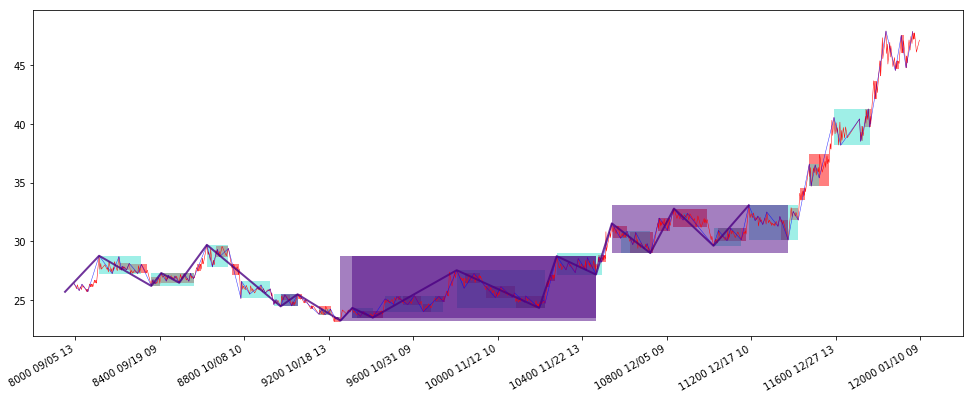

In [41]:
s_idx, e_idx = 8000, 12000
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)

## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(1200/72,480/72))

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list0)
center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list1, facecolor='turquoise')
center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list2,  facecolor='indigo')
'''
pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)
'''

fig.autofmt_xdate()
plt.savefig('全景{0}_{1}.png'.format(str(int(s_idx)), str(int(e_idx))))

In [36]:
[[m.Lv2_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.TmE, cc.is_main,cc.L,cc.H, cc.st_idxL[-8:]] for cc in m.CLv2_L]

[[0.0, 4.0, 1046.0, 10, 19.9517, 23.5542, [2, 3, 4, 5, 6, 7, 8, 9]],
 [572.0, 632.0, 1046.0, 0, 19.9517, 23.3549, [6, 7, 8, 9, 10]],
 [632.0, 720.0, 1046.0, 0, 19.9517, 22.8797, [7, 8, 9, 10]],
 [1046.0, 0, 0, 0, 0, 0, [10]],
 [1046.0, 1244.0, 1254.0, 10, 23.7764, 24.7192, [10, 11]],
 [1254.0, 1445.0, 1548.0, 10, 25.3171, 27.1183, [12, 13]],
 [1548.0,
  1669.0,
  2937.0,
  10,
  27.264,
  33.9324,
  [15, 16, 17, 18, 19, 20, 21, 22]],
 [1669.0,
  1781.0,
  2937.0,
  0,
  27.264,
  33.9324,
  [16, 17, 18, 19, 20, 21, 22, 23]],
 [2064.0, 2346.0, 2937.0, 0, 27.264, 33.9324, [20, 21, 22, 23]],
 [2937.0, 3829.0, 6779.0, 0, 19.6451, 25.43, [36, 37, 38, 39, 40, 41, 42, 43]],
 [4182.0, 4460.0, 6779.0, 0, 19.6451, 25.43, [36, 37, 38, 39, 40, 41, 42, 43]],
 [5795.0, 6144.0, 6529.0, 10, 20.34, 21.52, [37, 38, 39, 40, 41]],
 [6529.0, 0, 0, 0, 0, 0, [42]],
 [6529.0, 6779.0, 9256.0, 0, 23.02, 29.7, [51, 52, 53, 54, 55, 56, 57, 58]],
 [8624.0, 8973.0, 9053.0, 10, 24.46, 25.49, [55, 56]],
 [9053.0, 925

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=True)
#ax.text(11442,33.93,'33.93')
ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.savefig("image01.png")
plt.show()

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)